In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data from the xlsx files
average_chemical_data = pd.read_excel('../DATA/averageChemical.xlsx')
taste_processed_data = pd.read_excel('../DATA/tasteProcessedData.xlsx')

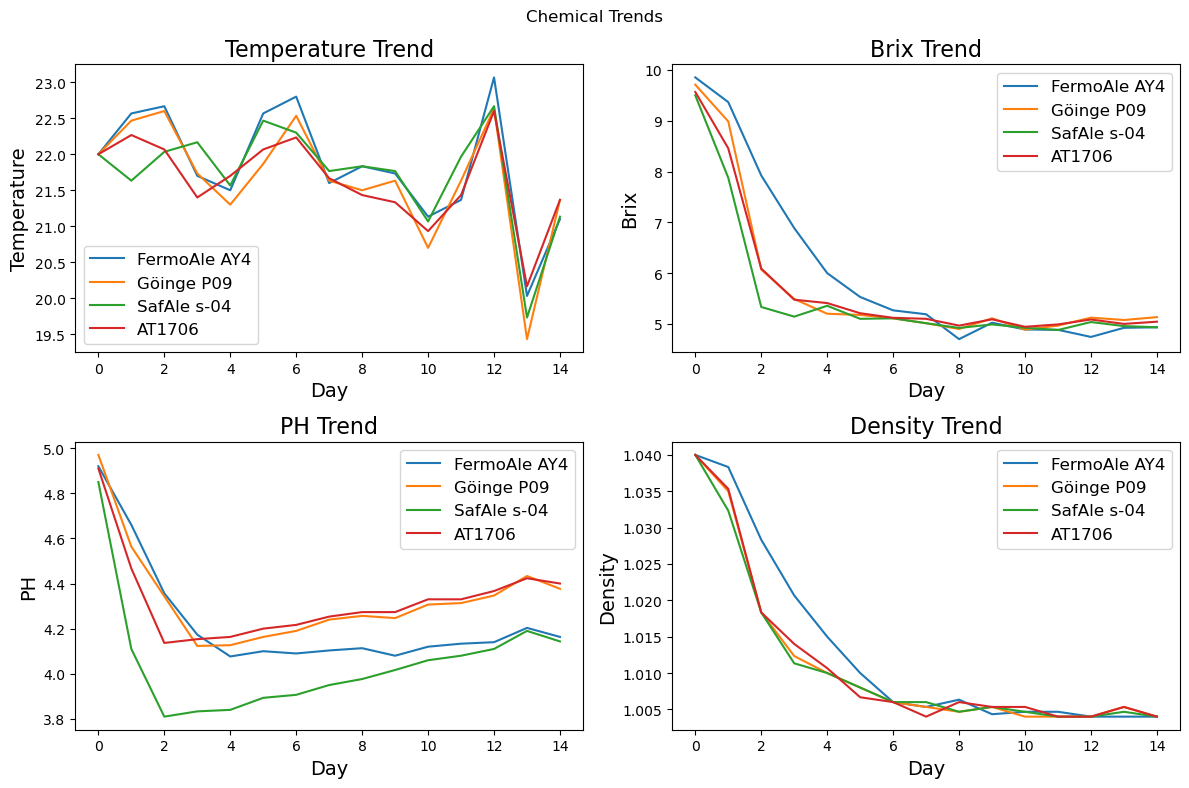

In [3]:
days = range(15)
temperature_cols = [f'AVERAGE of Temperature {i}' for i in range(15)]
brix_cols = [f'AVERAGE of Brix {i}' for i in range(15)]
ph_cols = [f'AVERAGE of PH {i}' for i in range(15)]
density_cols = [f'AVERAGE of Density {i}' for i in range(15)]

# create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# plot data on each of the subplots
axs[0, 0].plot(days, average_chemical_data.loc[0, temperature_cols], label='FermoAle AY4')
axs[0, 0].plot(days, average_chemical_data.loc[1, temperature_cols], label='Göinge P09')
axs[0, 0].plot(days, average_chemical_data.loc[2, temperature_cols], label='SafAle s-04')
axs[0, 0].plot(days, average_chemical_data.loc[3, temperature_cols], label='AT1706')
axs[0, 0].set_xlabel('Day', fontsize=14)
axs[0, 0].set_ylabel('Temperature', fontsize=14)
axs[0, 0].set_title('Temperature Trend', fontsize=16)
axs[0, 0].legend(fontsize=12)

axs[0, 1].plot(days, average_chemical_data.loc[0, brix_cols], label='FermoAle AY4')
axs[0, 1].plot(days, average_chemical_data.loc[1, brix_cols], label='Göinge P09')
axs[0, 1].plot(days, average_chemical_data.loc[2, brix_cols], label='SafAle s-04')
axs[0, 1].plot(days, average_chemical_data.loc[3, brix_cols], label='AT1706')
axs[0, 1].set_xlabel('Day', fontsize=14)
axs[0, 1].set_ylabel('Brix', fontsize=14)
axs[0, 1].set_title('Brix Trend', fontsize=16)
axs[0, 1].legend(fontsize=12)

axs[1, 0].plot(days, average_chemical_data.loc[0, ph_cols], label='FermoAle AY4')
axs[1, 0].plot(days, average_chemical_data.loc[1, ph_cols], label='Göinge P09')
axs[1, 0].plot(days, average_chemical_data.loc[2, ph_cols], label='SafAle s-04')
axs[1, 0].plot(days, average_chemical_data.loc[3, ph_cols], label='AT1706')
axs[1, 0].set_xlabel('Day', fontsize=14)
axs[1, 0].set_ylabel('PH', fontsize=14)
axs[1, 0].set_title('PH Trend', fontsize=16)
axs[1, 0].legend(fontsize=12)

axs[1, 1].plot(days, average_chemical_data.loc[0, density_cols], label='FermoAle AY4')
axs[1, 1].plot(days, average_chemical_data.loc[1, density_cols], label='Göinge P09')
axs[1, 1].plot(days, average_chemical_data.loc[2, density_cols], label='SafAle s-04')
axs[1, 1].plot(days, average_chemical_data.loc[3, density_cols], label='AT1706')
axs[1, 1].set_xlabel('Day', fontsize=14)
axs[1, 1].set_ylabel('Density', fontsize=14)
axs[1, 1].set_title('Density Trend', fontsize=16)
axs[1, 1].legend(fontsize=12)

# add a title to the figure
fig.suptitle('Chemical Trends')

# adjust the layout and spacing of the subplots
fig.tight_layout()

# display the figure
plt.show()

In [4]:
# Set the index of both DataFrames to the yeast type columns
average_chemical_data.set_index(['FermoAle AY4', 'Göinge P09', 'SafAle s-04', 'AT1706'], inplace=True)
taste_processed_data.set_index(['FermoAle AY4', 'Göinge P09', 'SafAle s-04', 'AT1706'], inplace=True)

# Join the two DataFrames using the .join() method
merged_data = average_chemical_data.join(taste_processed_data)

# Reset the index to have the yeast type columns as regular columns again
merged_data.reset_index(inplace=True)

In [5]:
print(merged_data.columns)

Index(['FermoAle AY4', 'Göinge P09', 'SafAle s-04', 'AT1706', 'Yeast',
       'AVERAGE of Temperature 0', 'AVERAGE of Brix 0', 'AVERAGE of PH 0',
       'AVERAGE of Density 0', 'AVERAGE of Temperature 1',
       ...
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31'],
      dtype='object', length=108)


In [6]:
merged_data = merged_data.drop(columns=['U42767','U42772', 'U42773', 'U42774', 'U42775', 'U42779', 'U42783', 'U42789', 'one', 'two', 'sequence', 'replica'])
# 'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31',

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
def plot_scatter(y_test, y_pred, target):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'True vs Predicted Values for {target}')

    max_val = max(y_test.max(), y_pred.max())
    plt.plot([0, max_val], [0, max_val], 'k--', lw=3, label='Perfect Prediction')
    plt.legend()

    plt.show()

# KNeighborsRegressor
## For Loop

In [9]:
# Prepare the data
excluded_columns = ['Q1', 'Yeast']
X = merged_data[merged_data.columns[~merged_data.columns.isin(excluded_columns)]]
y = merged_data['Q1']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a k-NN regressor with 3 neighbors
knn = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 97.26061111111112
Mean Absolute Error: 8.235


Predicting Q1:
Mean Squared Error for Q1: 97.26061111111112
Mean Absolute Error for Q1: 8.235


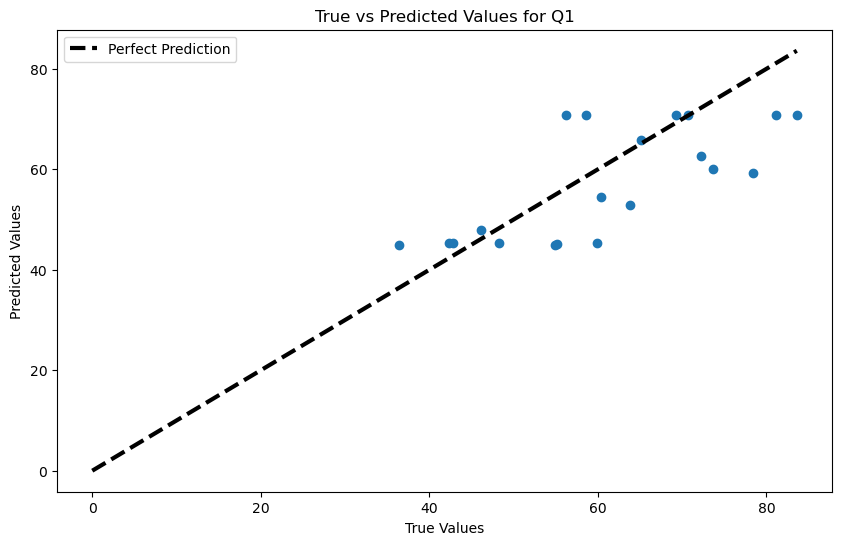


Predicting Q2:
Mean Squared Error for Q2: 61.1028888888889
Mean Absolute Error for Q2: 6.99


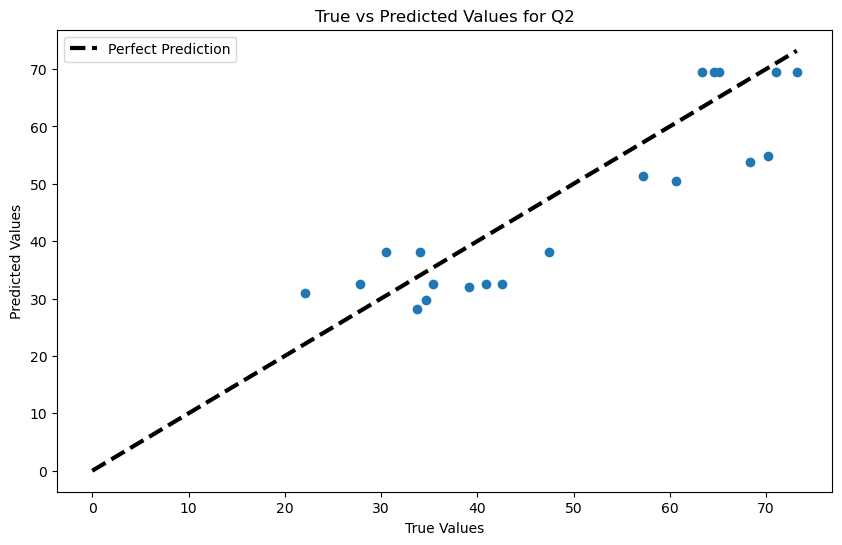


Predicting Q3:
Mean Squared Error for Q3: 41.73711111111112
Mean Absolute Error for Q3: 4.973333333333334


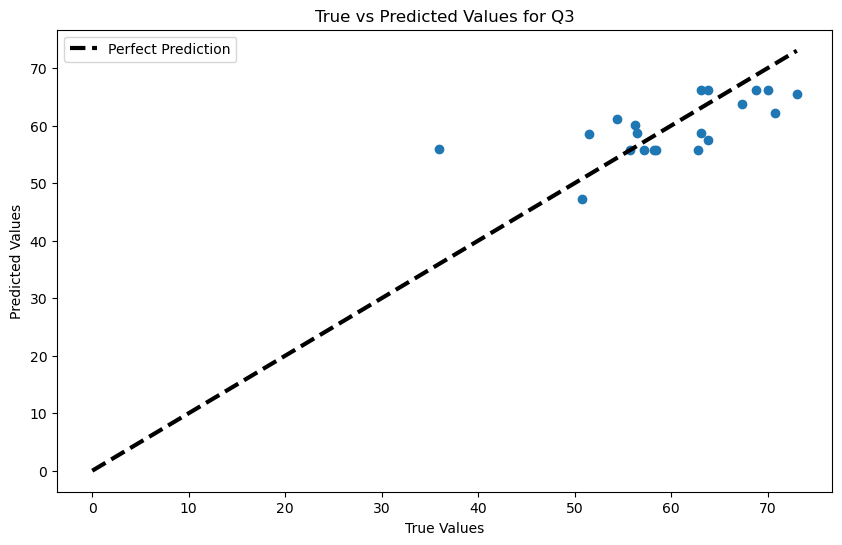


Predicting Q4:
Mean Squared Error for Q4: 107.02577777777779
Mean Absolute Error for Q4: 9.126666666666669


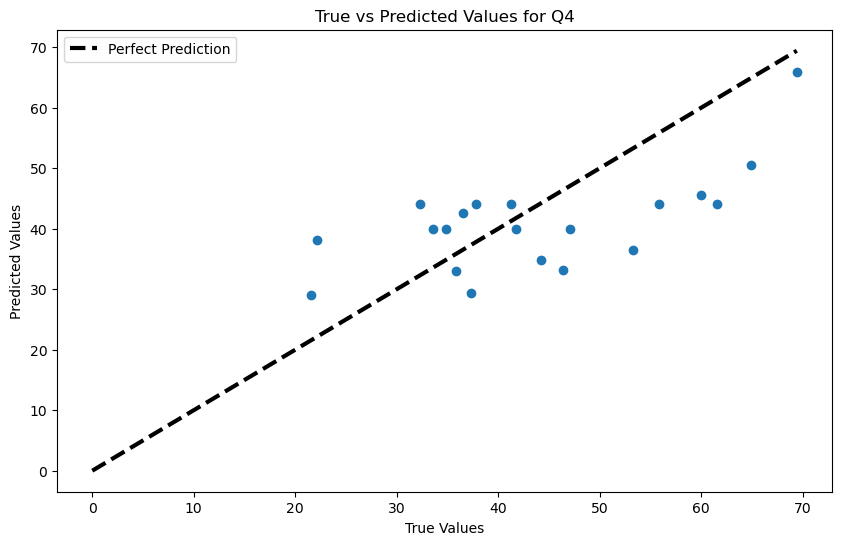


Predicting Q5:
Mean Squared Error for Q5: 125.80999999999999
Mean Absolute Error for Q5: 7.339999999999998


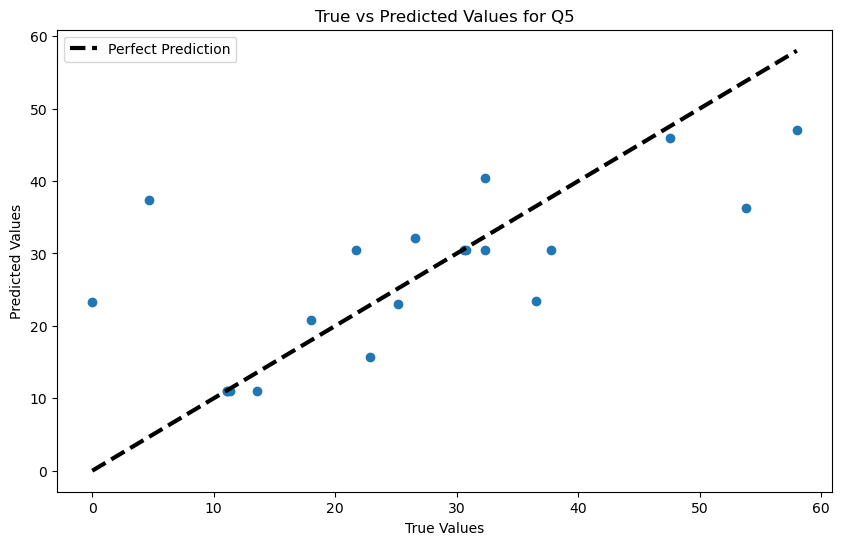


Predicting Q6:
Mean Squared Error for Q6: 113.42488888888893
Mean Absolute Error for Q6: 8.629999999999999


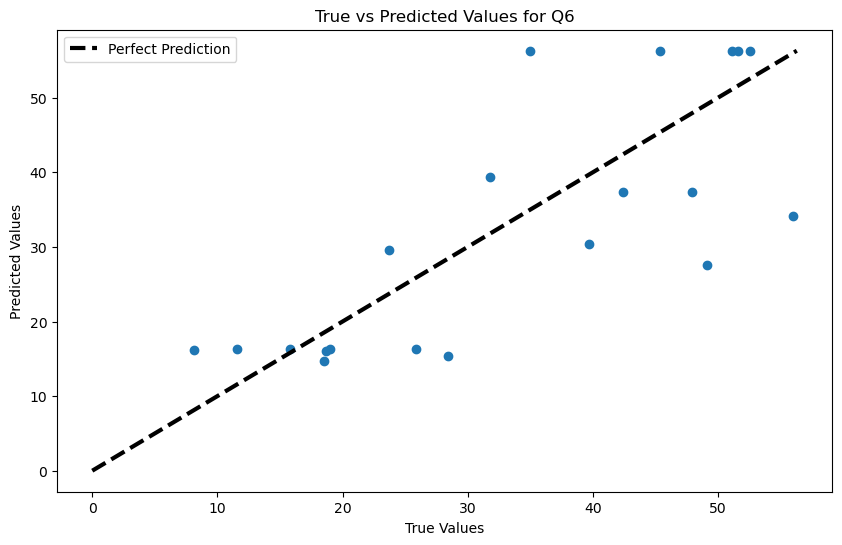


Predicting Q7:
Mean Squared Error for Q7: 104.38061111111112
Mean Absolute Error for Q7: 6.628333333333336


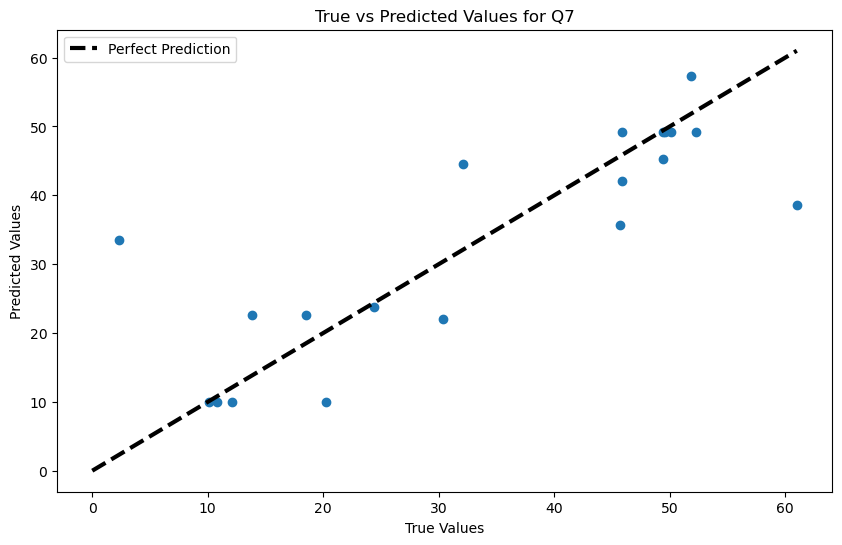


Predicting Q8:
Mean Squared Error for Q8: 123.98061111111107
Mean Absolute Error for Q8: 8.711666666666664


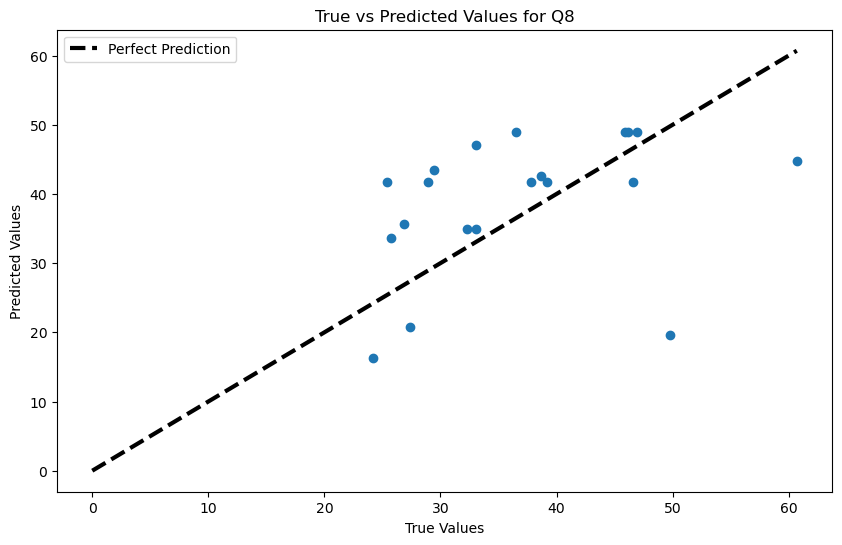


Predicting Q9:
Mean Squared Error for Q9: 51.49716666666667
Mean Absolute Error for Q9: 5.931666666666667


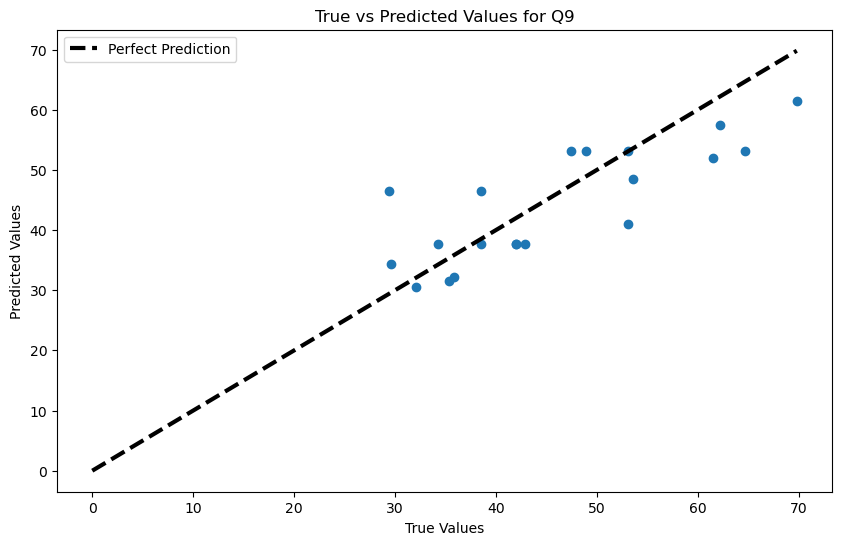


Predicting Q10:
Mean Squared Error for Q10: 133.4813333333333
Mean Absolute Error for Q10: 8.75


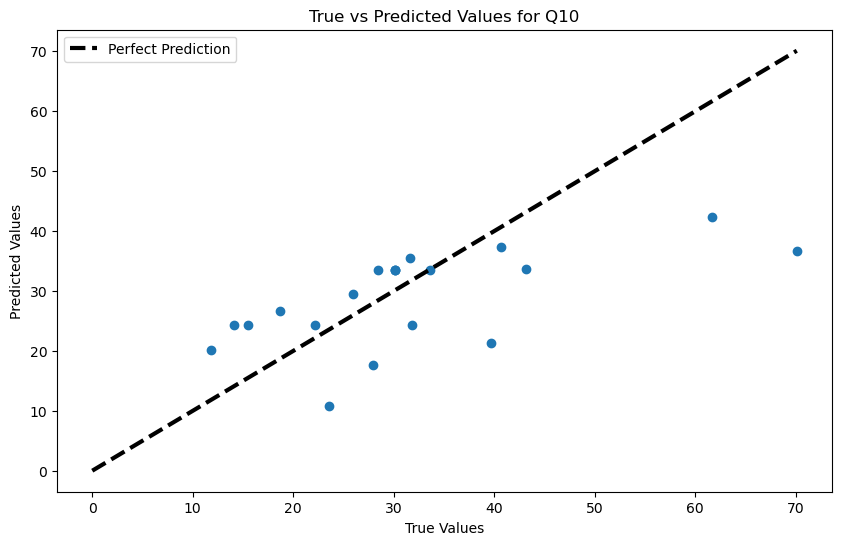


Predicting Q11:
Mean Squared Error for Q11: 179.78233333333338
Mean Absolute Error for Q11: 9.896666666666667


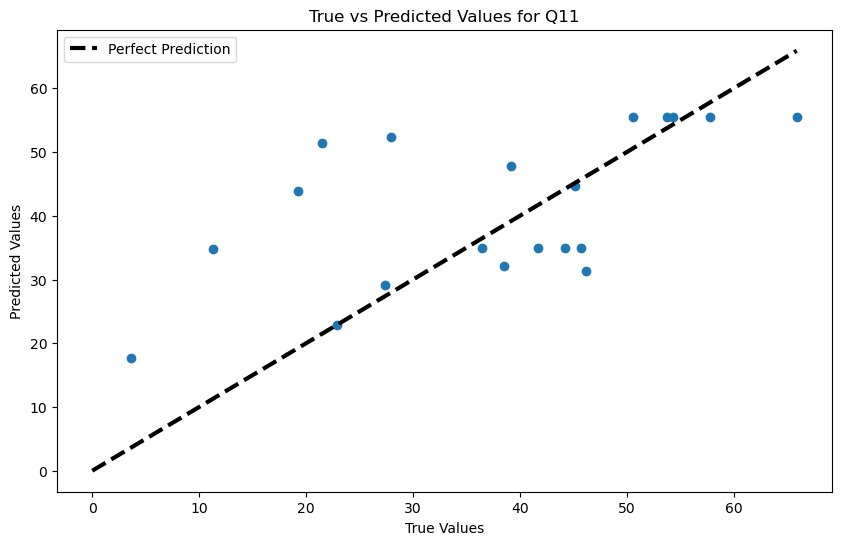


Predicting Q12:
Mean Squared Error for Q12: 220.23461111111115
Mean Absolute Error for Q12: 7.991666666666667


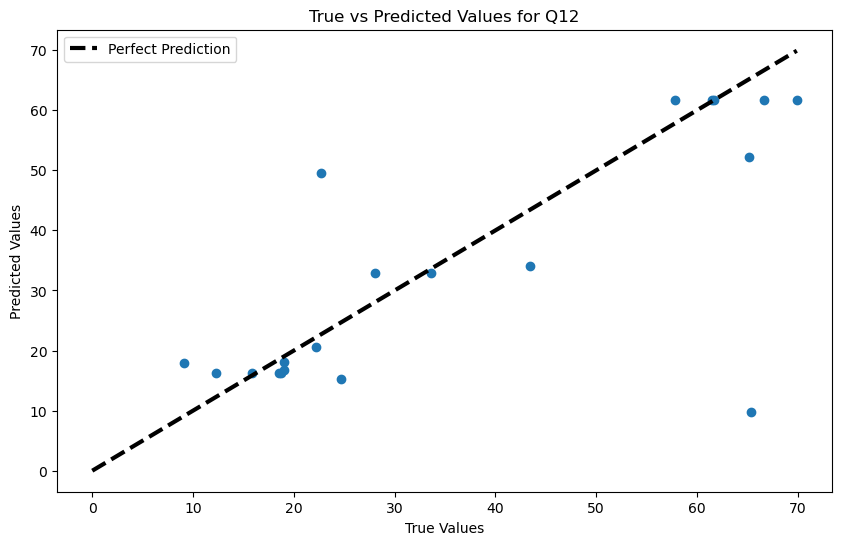


Predicting Q13:
Mean Squared Error for Q13: 187.7213333333333
Mean Absolute Error for Q13: 8.916666666666666


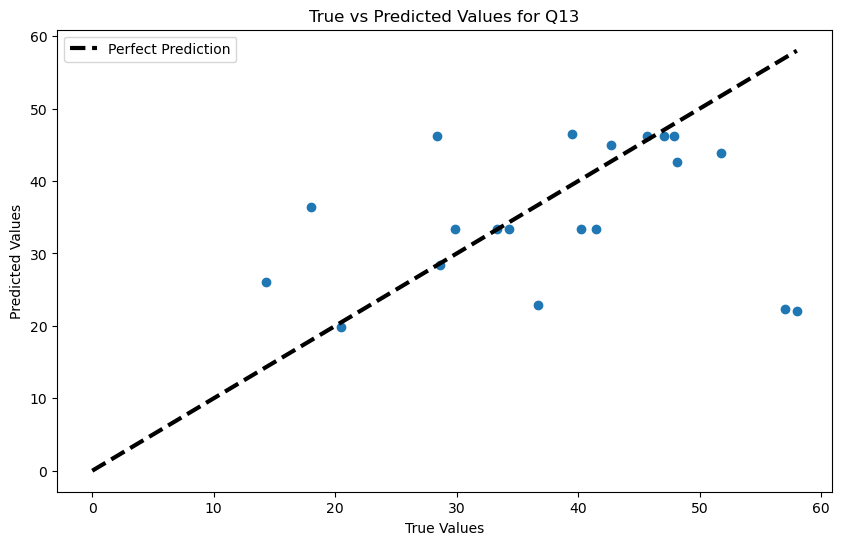


Predicting Q14:
Mean Squared Error for Q14: 61.33950000000001
Mean Absolute Error for Q14: 4.798333333333333


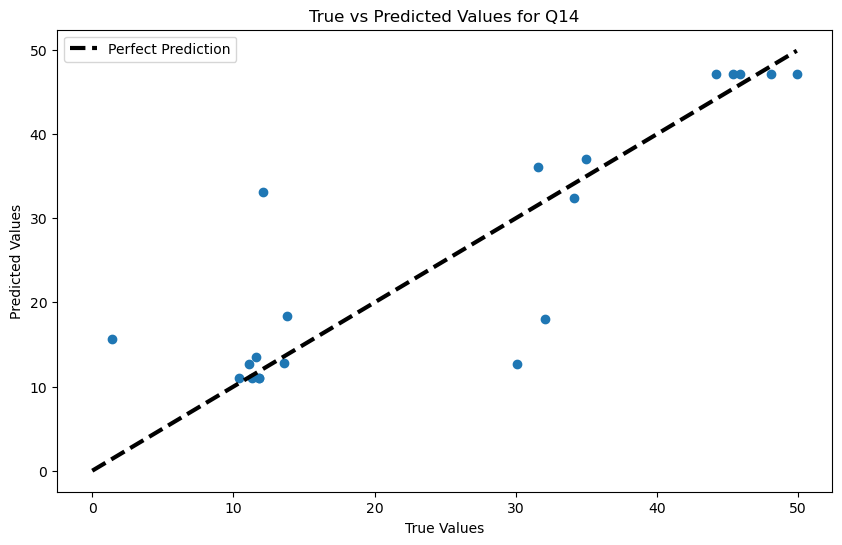


Predicting Q15:
Mean Squared Error for Q15: 41.11205555555556
Mean Absolute Error for Q15: 5.388333333333333


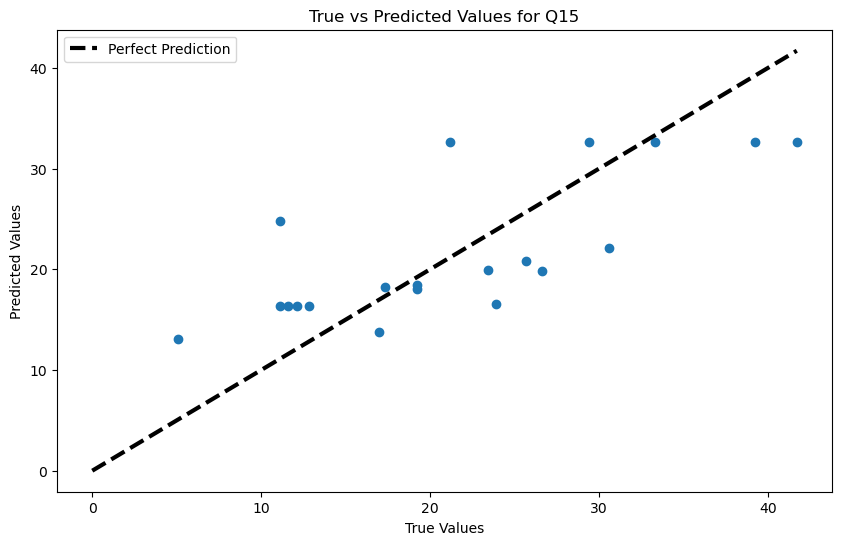


Predicting Q16:
Mean Squared Error for Q16: 108.3873333333333
Mean Absolute Error for Q16: 6.393333333333333


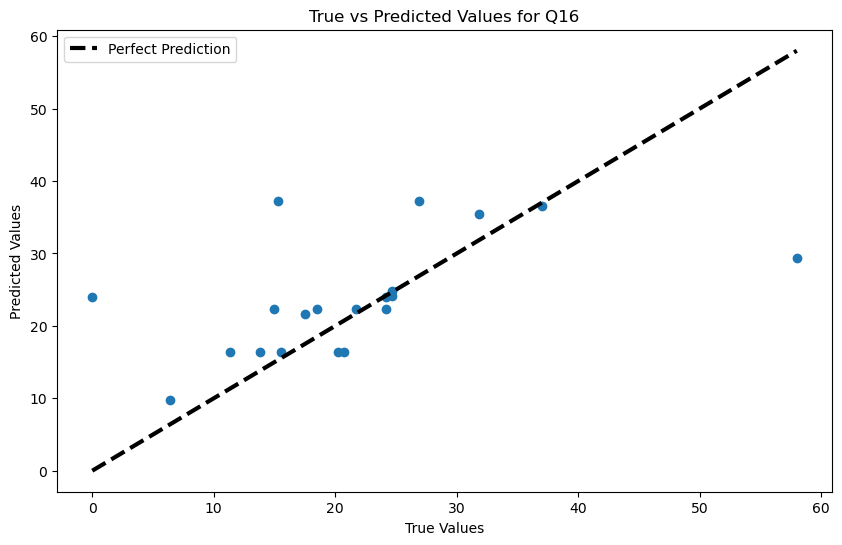


Predicting Q17:
Mean Squared Error for Q17: 52.28416666666667
Mean Absolute Error for Q17: 6.245


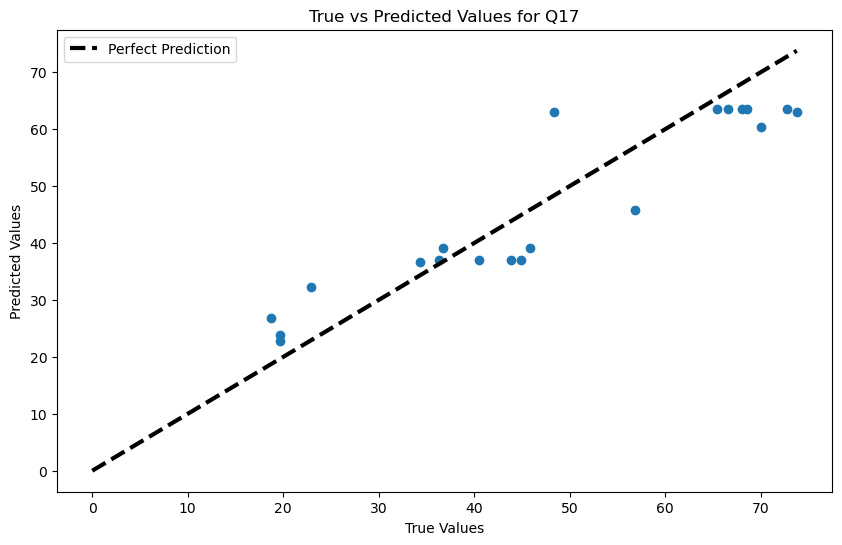


Predicting Q18:
Mean Squared Error for Q18: 44.27066666666667
Mean Absolute Error for Q18: 5.036666666666664


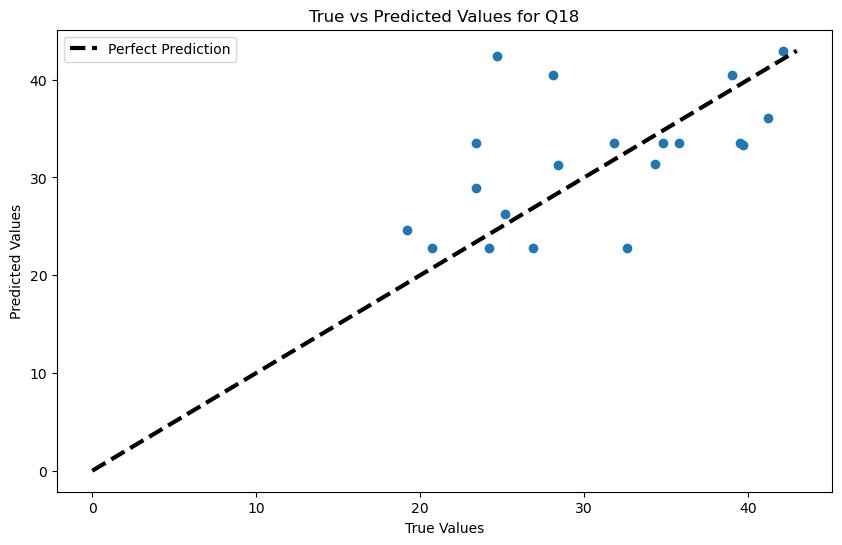


Predicting Q19:
Mean Squared Error for Q19: 40.795388888888894
Mean Absolute Error for Q19: 4.531666666666665


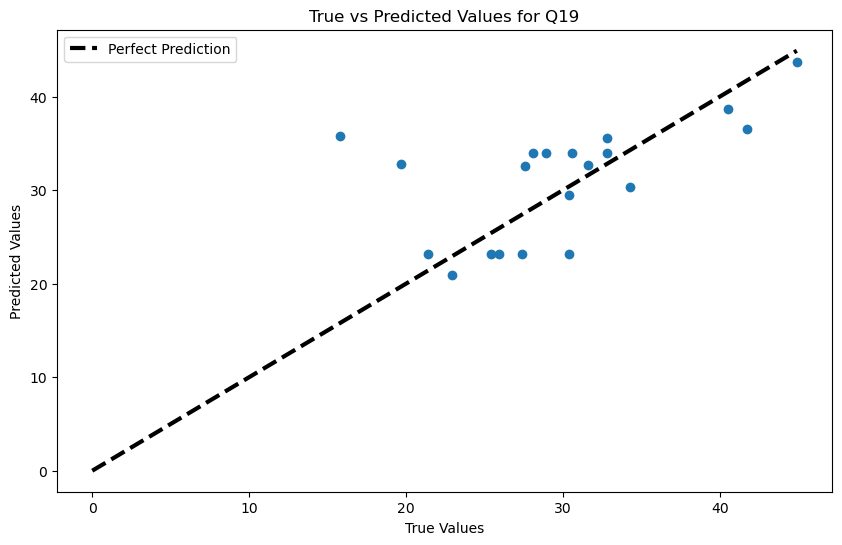


Predicting Q20:
Mean Squared Error for Q20: 102.33283333333335
Mean Absolute Error for Q20: 7.851666666666667


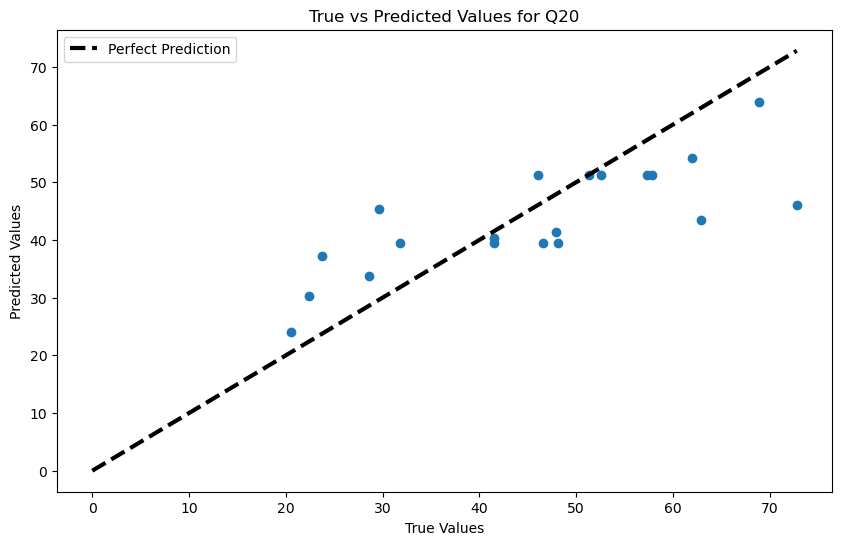


Predicting Q21:
Mean Squared Error for Q21: 89.1957222222222
Mean Absolute Error for Q21: 7.8583333333333325


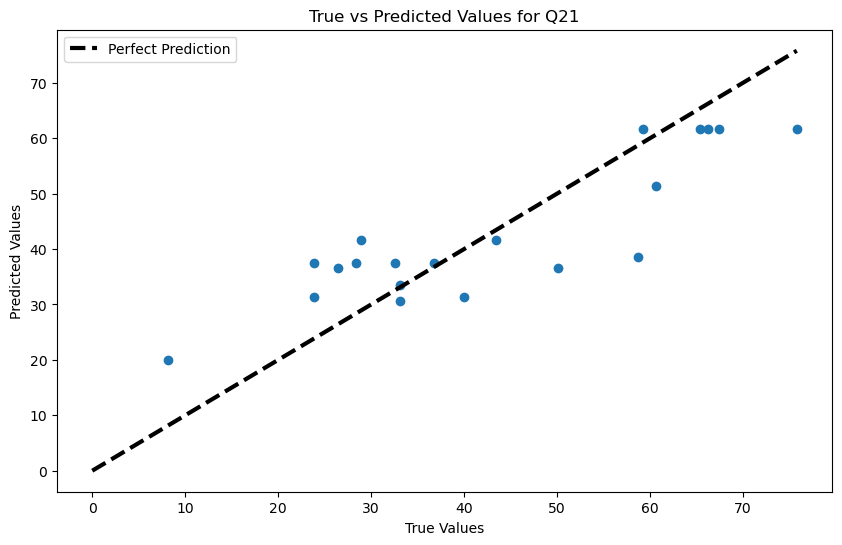


Predicting Q22:
Mean Squared Error for Q22: 143.19744444444444
Mean Absolute Error for Q22: 6.890000000000001


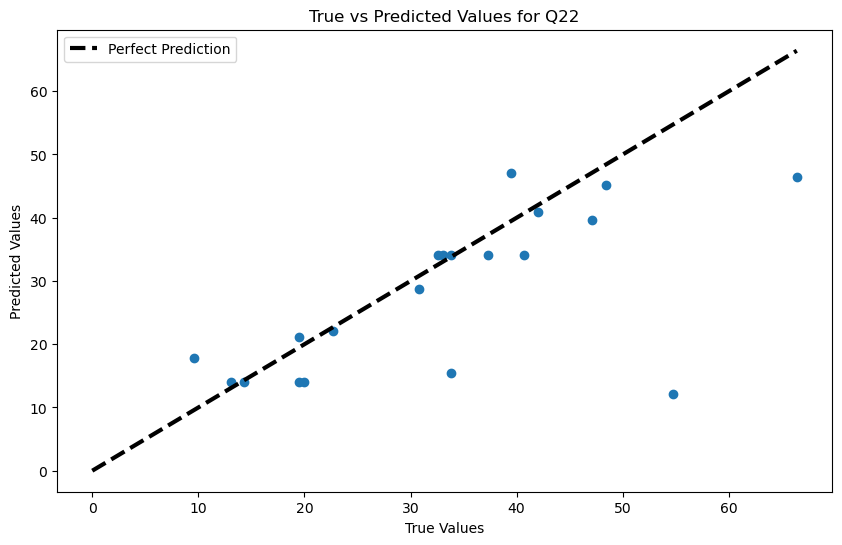


Predicting Q23:
Mean Squared Error for Q23: 114.98188888888885
Mean Absolute Error for Q23: 8.323333333333332


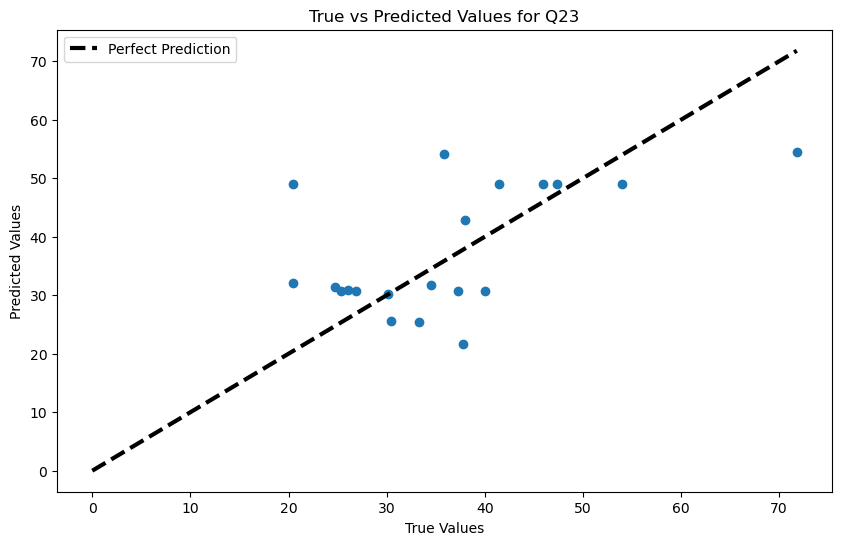


Predicting Q24:
Mean Squared Error for Q24: 103.06638888888885
Mean Absolute Error for Q24: 7.0683333333333325


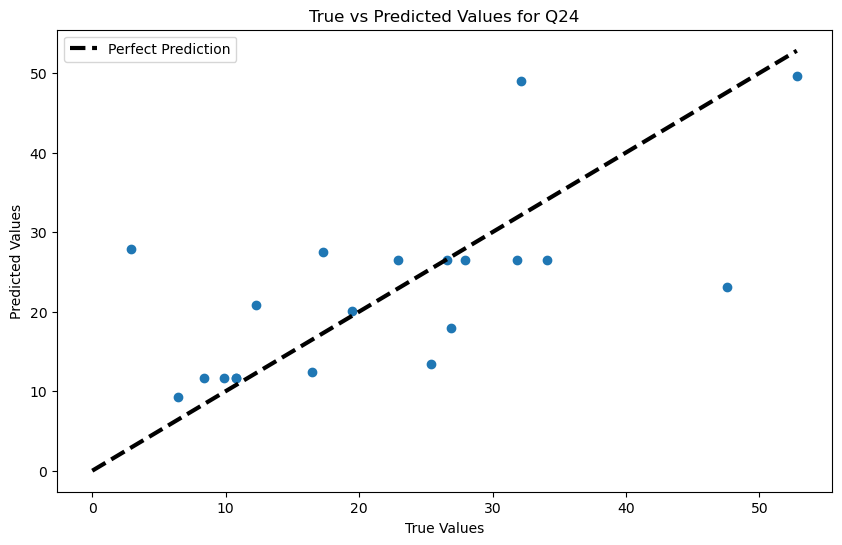


Predicting Q25:
Mean Squared Error for Q25: 24.644111111111105
Mean Absolute Error for Q25: 3.3133333333333312


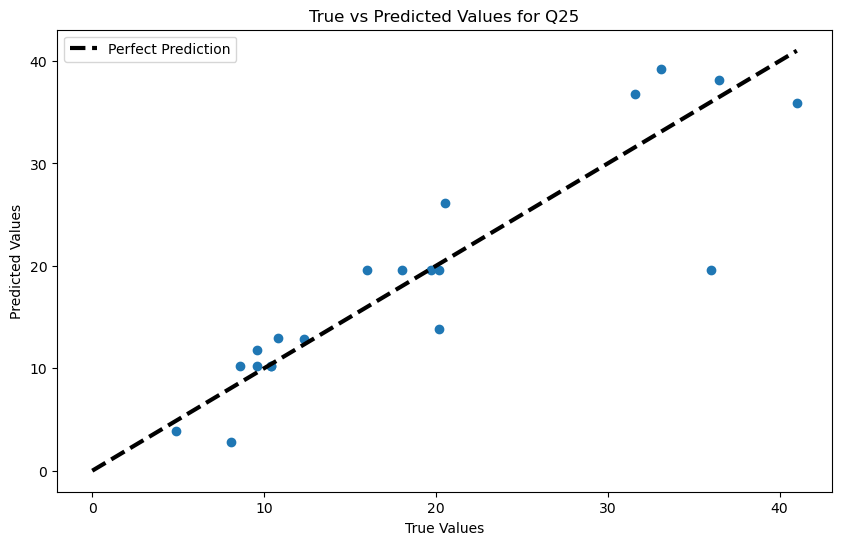


Predicting Q26:
Mean Squared Error for Q26: 110.97349999999994
Mean Absolute Error for Q26: 7.435


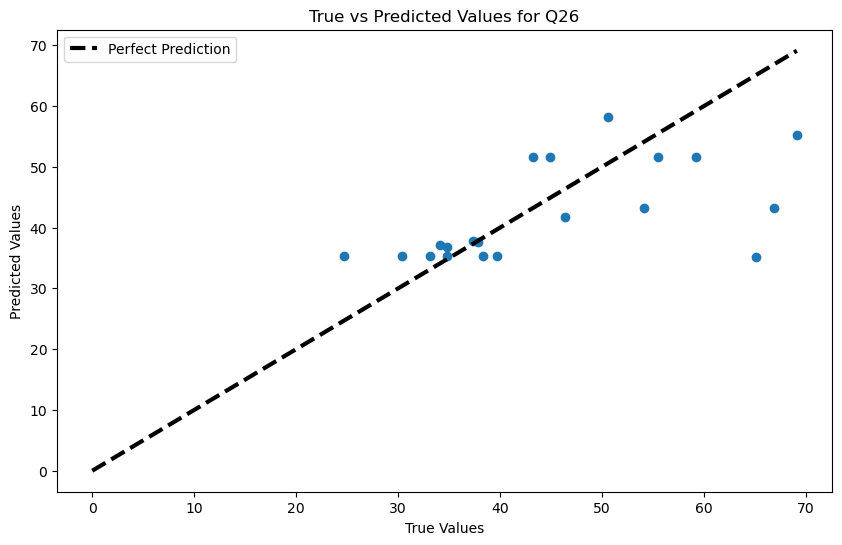


Predicting Q27:
Mean Squared Error for Q27: 241.3127222222222
Mean Absolute Error for Q27: 9.918333333333333


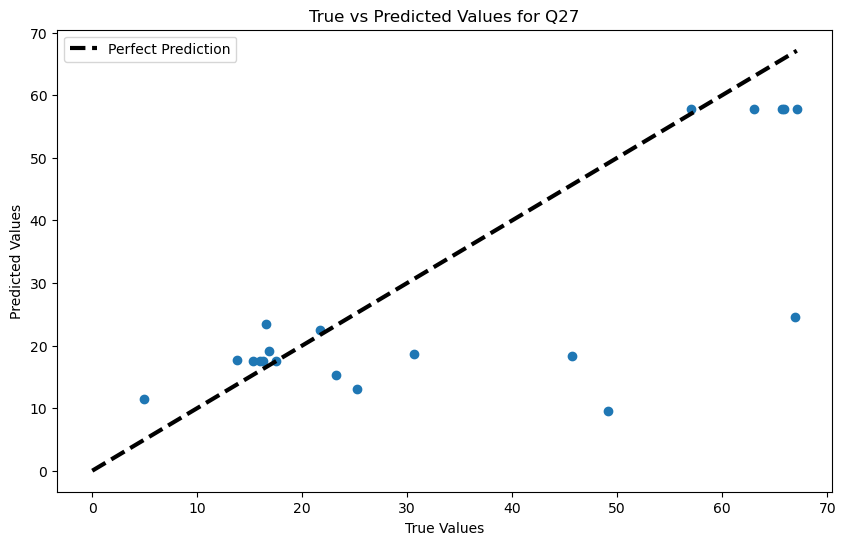


Predicting Q28:
Mean Squared Error for Q28: 59.279777777777795
Mean Absolute Error for Q28: 4.673333333333334


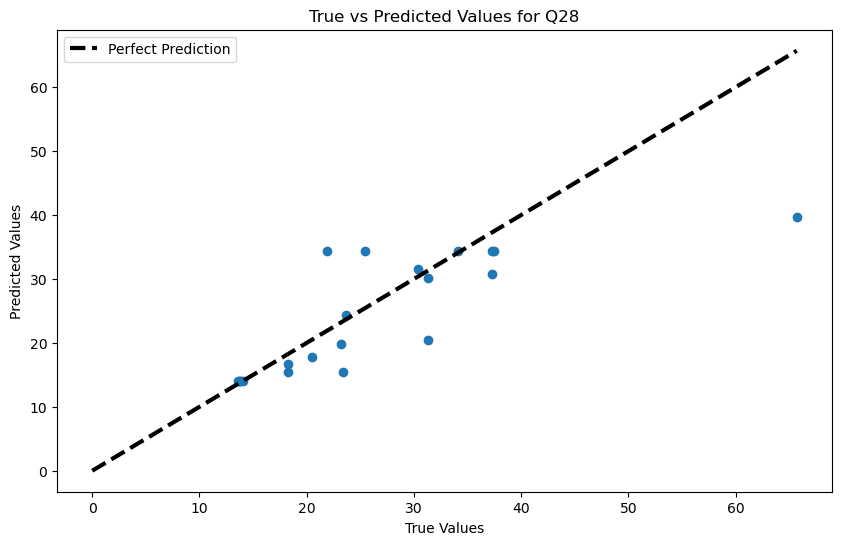


Predicting Q29:
Mean Squared Error for Q29: 57.07844444444446
Mean Absolute Error for Q29: 5.410000000000002


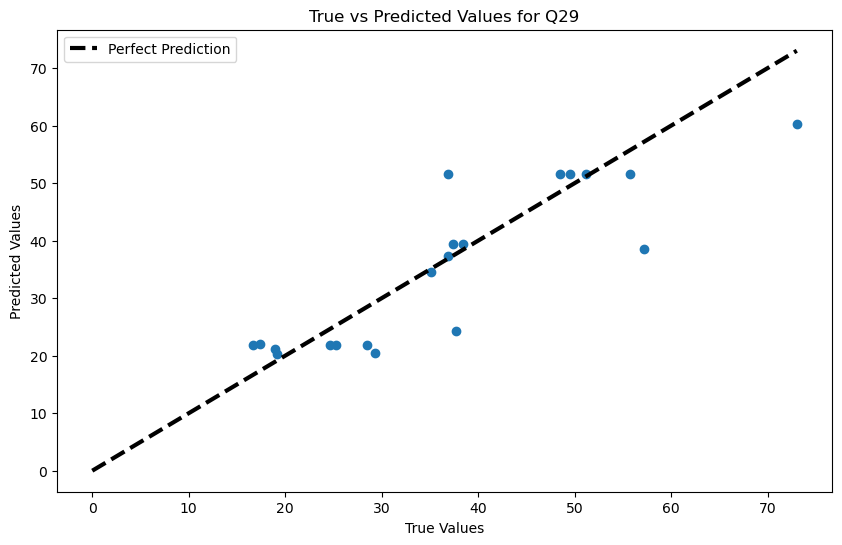


Predicting Q30:
Mean Squared Error for Q30: 57.00711111111109
Mean Absolute Error for Q30: 5.58333333333333


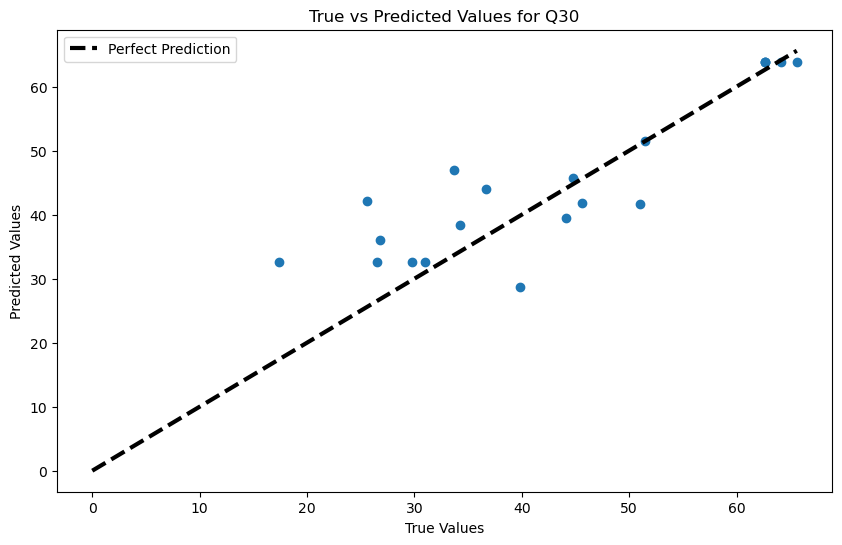


Predicting Q31:
Mean Squared Error for Q31: 23.669055555555552
Mean Absolute Error for Q31: 4.154999999999999


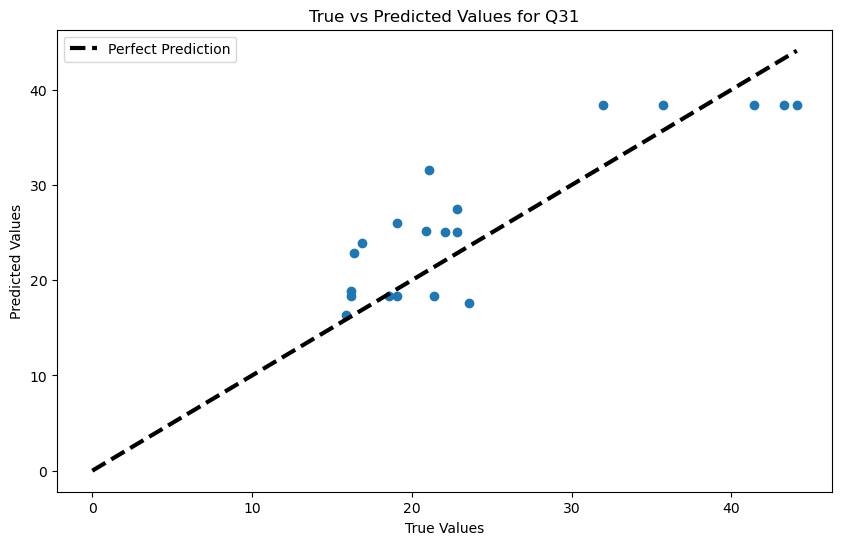

In [10]:
excluded_columns = ['Yeast']
target_columns = [f'Q{i}' for i in range(1, 32)]  # Create a list of target columns Q1-Q31

for target in target_columns:
    print(f'Predicting {target}:')

    X = merged_data[merged_data.columns[~merged_data.columns.isin(excluded_columns + [target])]]
    y = merged_data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {target}:", mse)

    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error for {target}:", mae)

    plot_scatter(y_test, y_pred, target)  # Call the function to plot the scatterplot

    print()

## MultiOutputRegressor

In [12]:
def plot_scatter(y_test, y_pred, target, target_index):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test.iloc[:, target_index], y_pred[:, target_index])
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'True vs Predicted Values for {target}')

    max_val = max(y_test.iloc[:, target_index].max(), y_pred[:, target_index].max())
    plt.plot([0, max_val], [0, max_val], 'k--', lw=3, label='Perfect Prediction')
    plt.legend()

    plt.show()

Predicting Q1:
Mean Squared Error for Q1: 190.98272222222226
Mean Absolute Error for Q1: 11.594999999999999


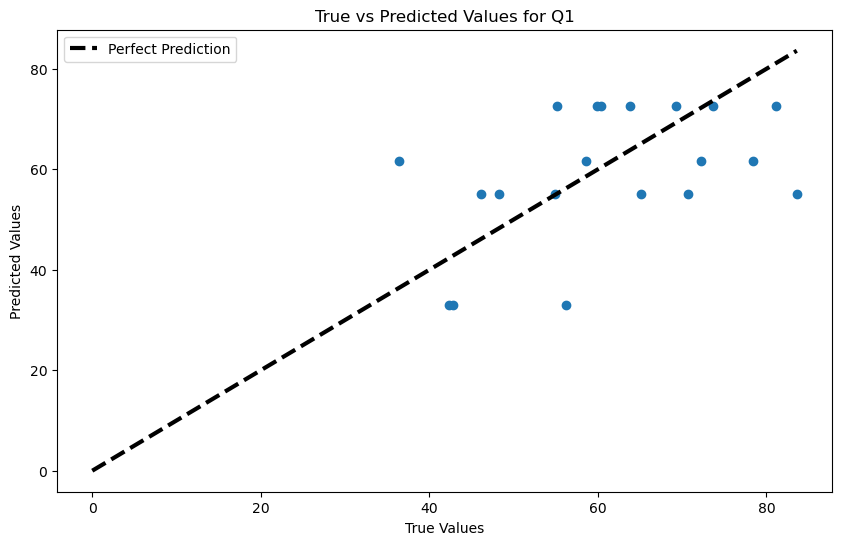


Predicting Q2:
Mean Squared Error for Q2: 314.9957777777778
Mean Absolute Error for Q2: 16.036666666666665


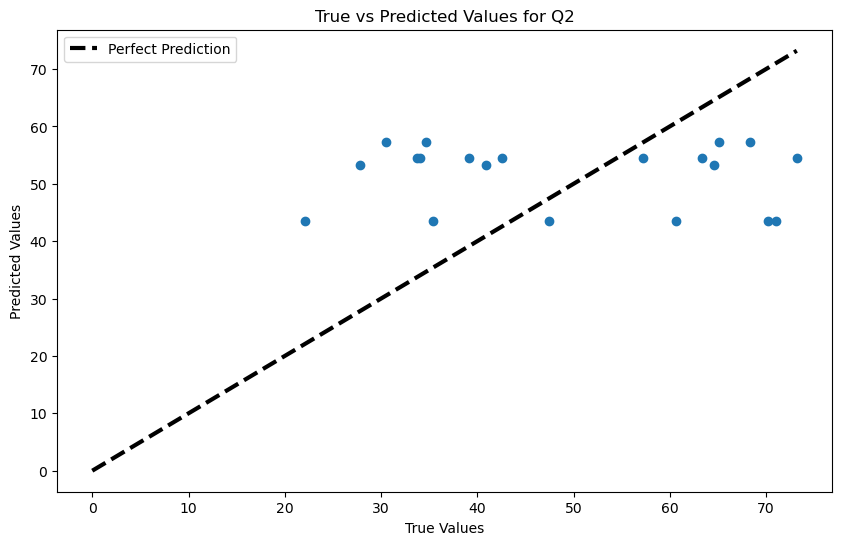


Predicting Q3:
Mean Squared Error for Q3: 117.51000000000003
Mean Absolute Error for Q3: 8.080000000000002


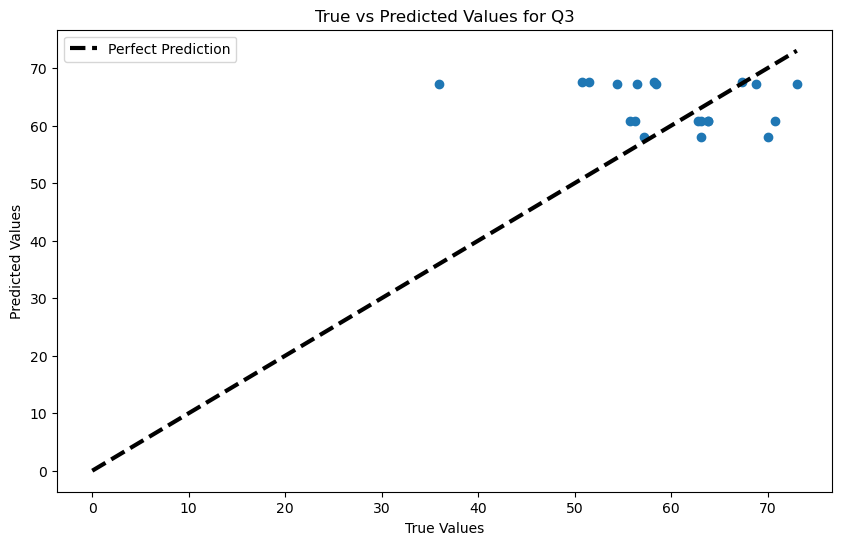


Predicting Q4:
Mean Squared Error for Q4: 399.5373333333332
Mean Absolute Error for Q4: 15.416666666666663


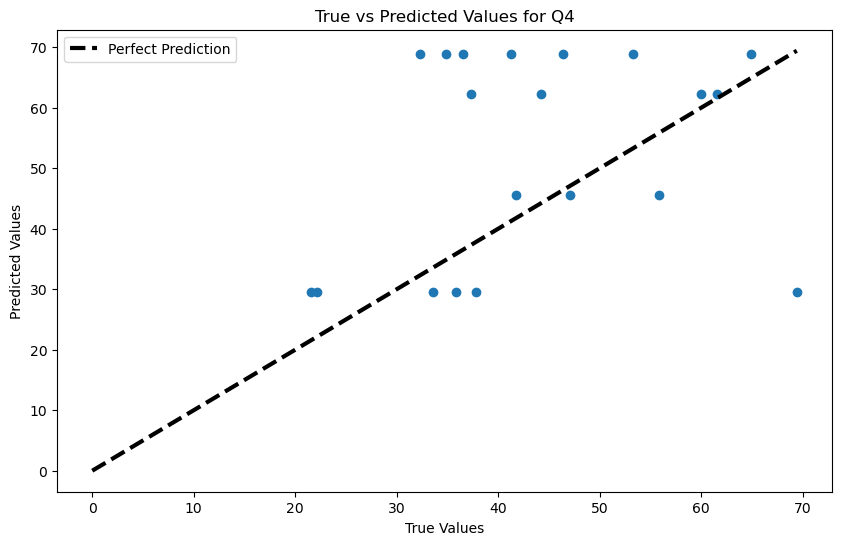


Predicting Q5:
Mean Squared Error for Q5: 605.421888888889
Mean Absolute Error for Q5: 20.586666666666666


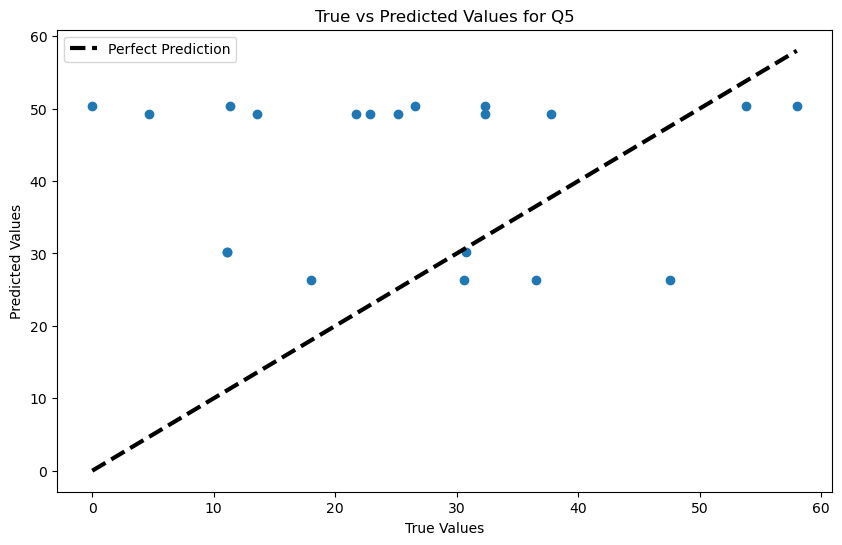


Predicting Q6:
Mean Squared Error for Q6: 363.39644444444446
Mean Absolute Error for Q6: 17.276666666666664


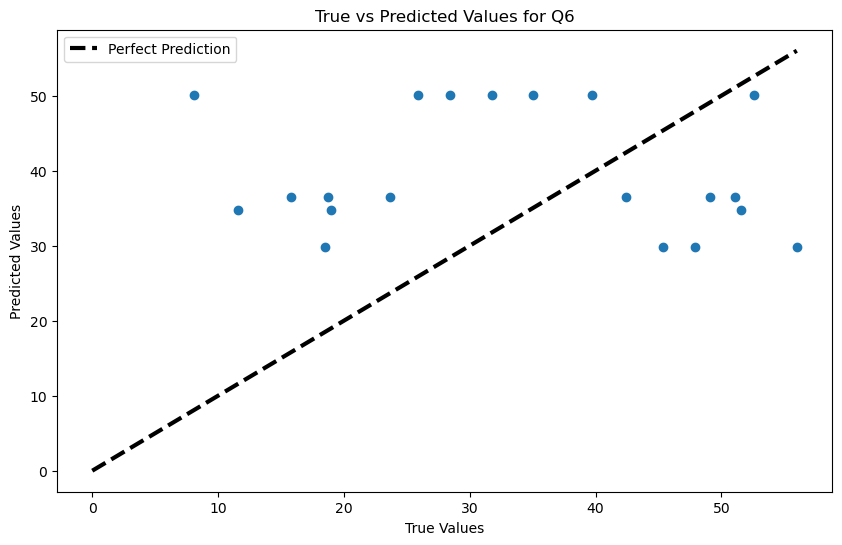


Predicting Q7:
Mean Squared Error for Q7: 335.33583333333337
Mean Absolute Error for Q7: 16.251666666666665


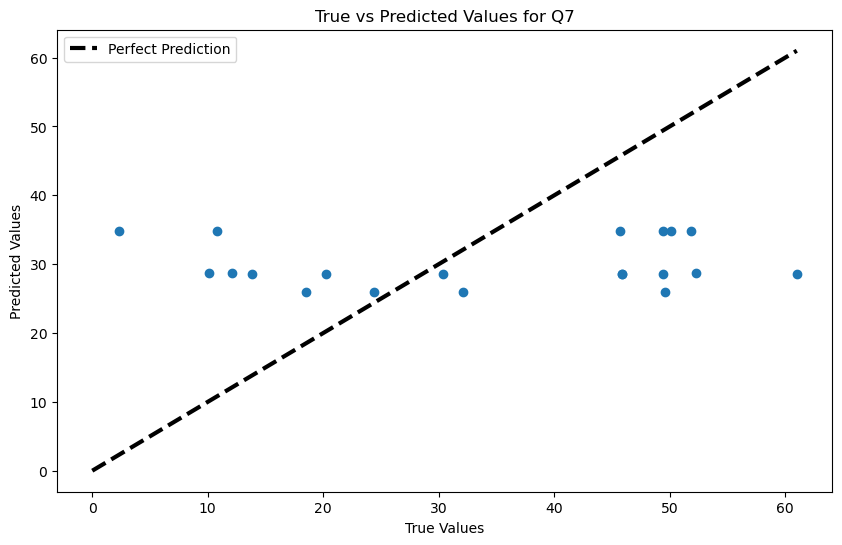


Predicting Q8:
Mean Squared Error for Q8: 337.22138888888895
Mean Absolute Error for Q8: 15.16166666666667


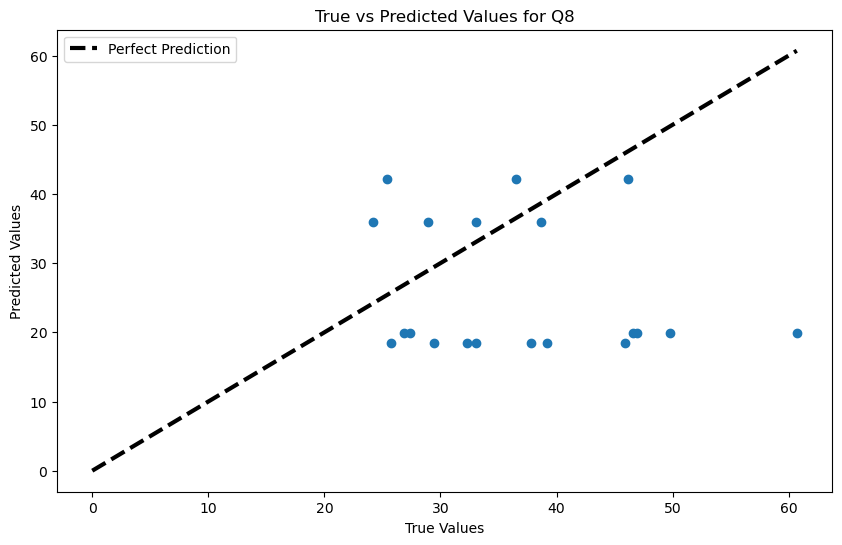


Predicting Q9:
Mean Squared Error for Q9: 316.87555555555565
Mean Absolute Error for Q9: 13.676666666666668


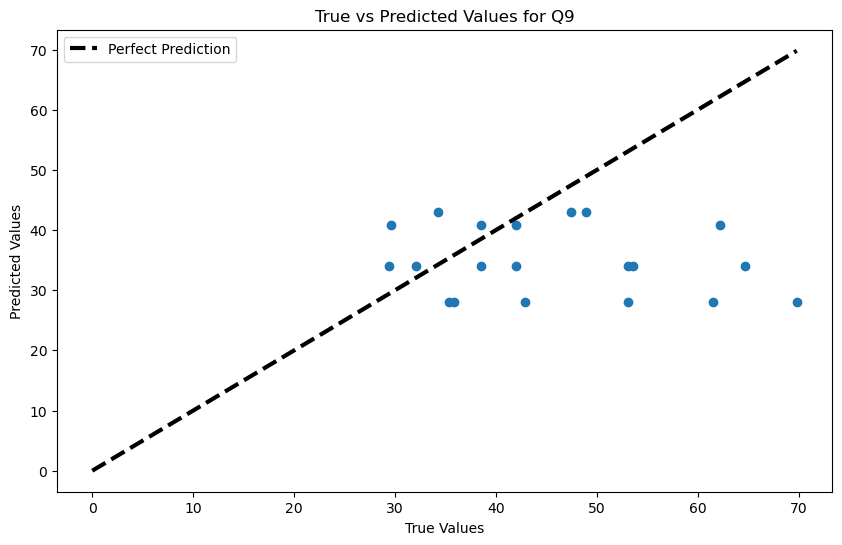


Predicting Q10:
Mean Squared Error for Q10: 422.5594444444444
Mean Absolute Error for Q10: 15.893333333333336


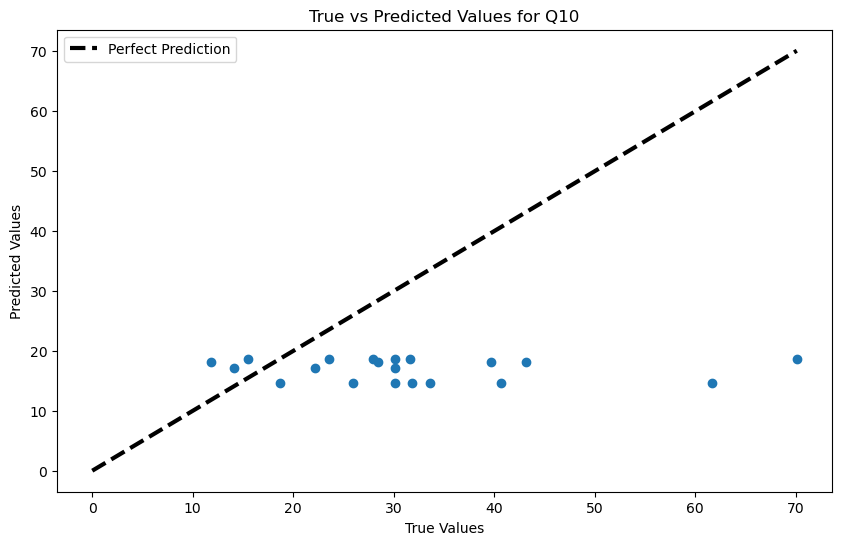


Predicting Q11:
Mean Squared Error for Q11: 375.778888888889
Mean Absolute Error for Q11: 16.270000000000003


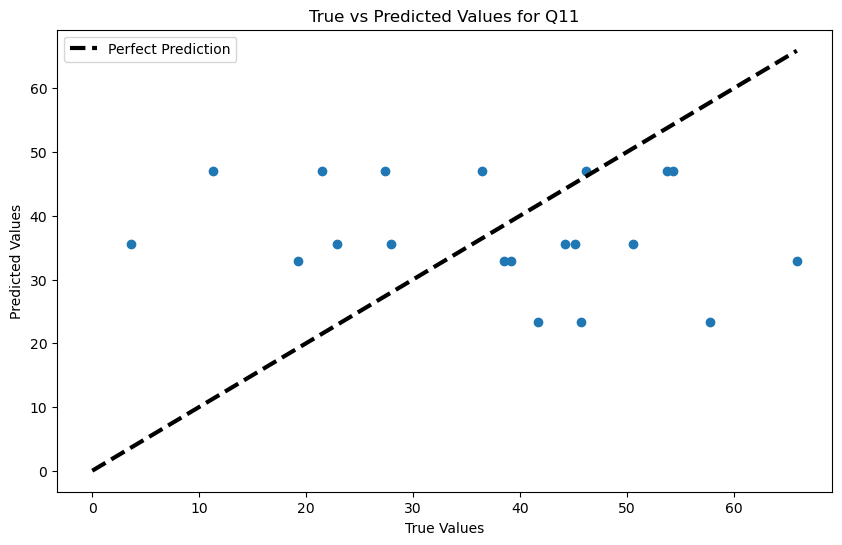


Predicting Q12:
Mean Squared Error for Q12: 796.0297222222222
Mean Absolute Error for Q12: 20.795


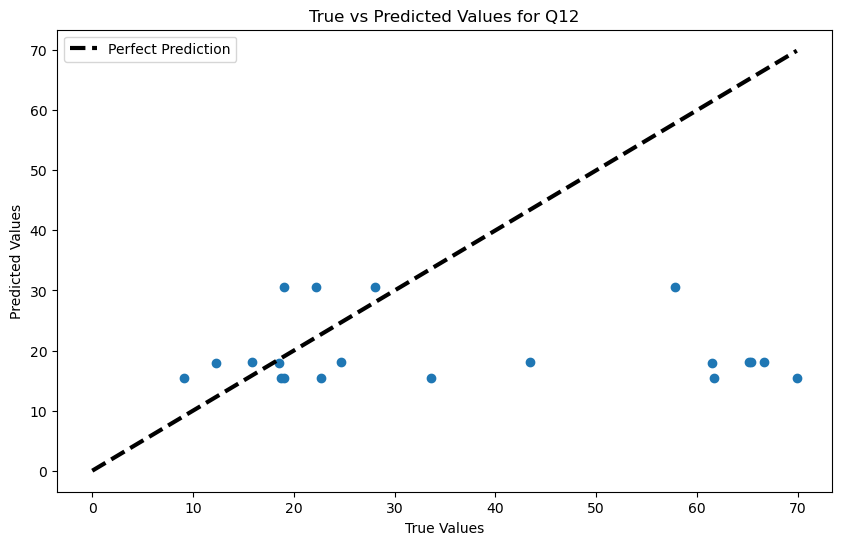


Predicting Q13:
Mean Squared Error for Q13: 295.25972222222214
Mean Absolute Error for Q13: 14.881666666666664


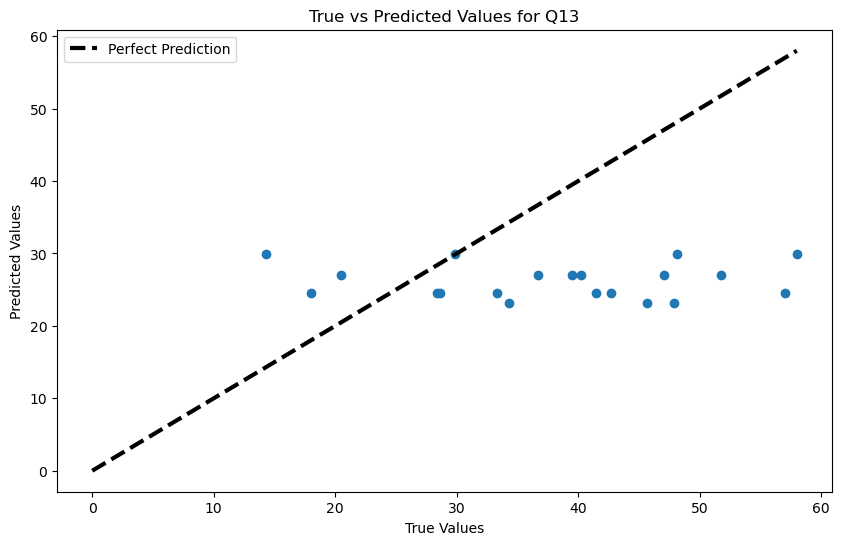


Predicting Q14:
Mean Squared Error for Q14: 347.98355555555554
Mean Absolute Error for Q14: 14.803333333333333


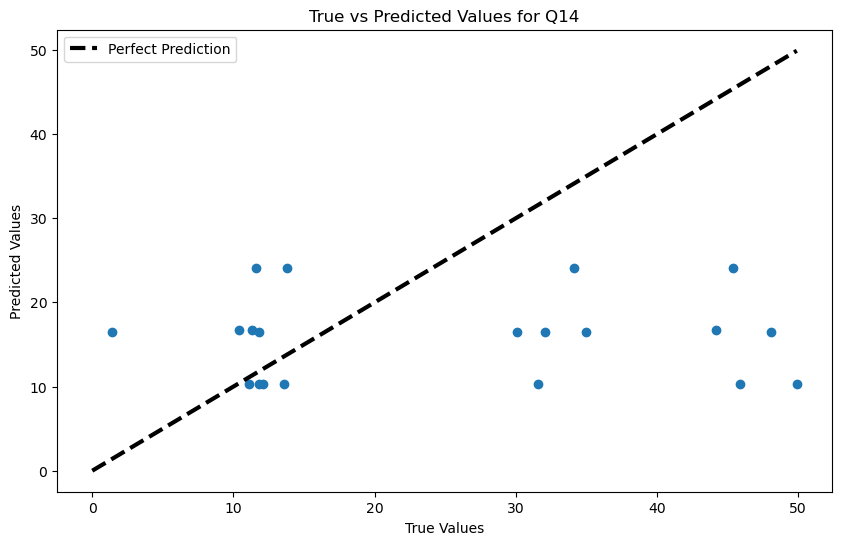


Predicting Q15:
Mean Squared Error for Q15: 202.03872222222225
Mean Absolute Error for Q15: 11.245000000000001


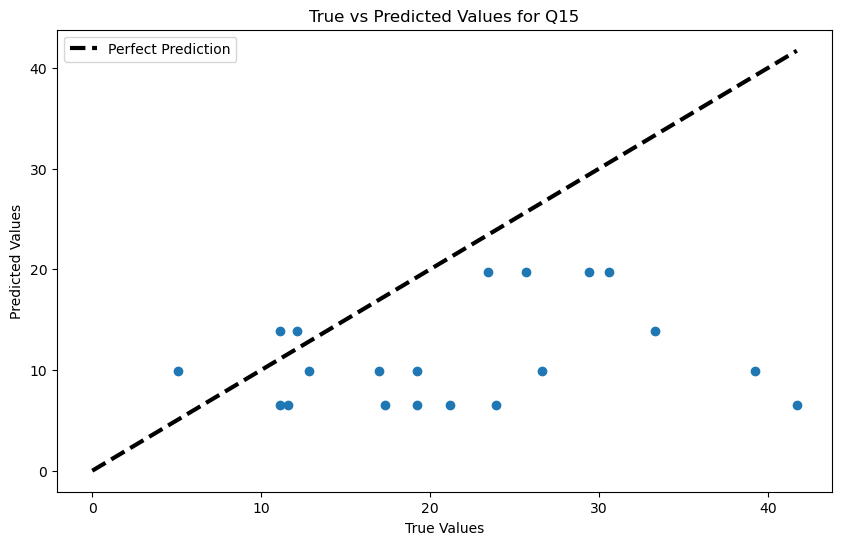


Predicting Q16:
Mean Squared Error for Q16: 181.40772222222222
Mean Absolute Error for Q16: 9.434999999999999


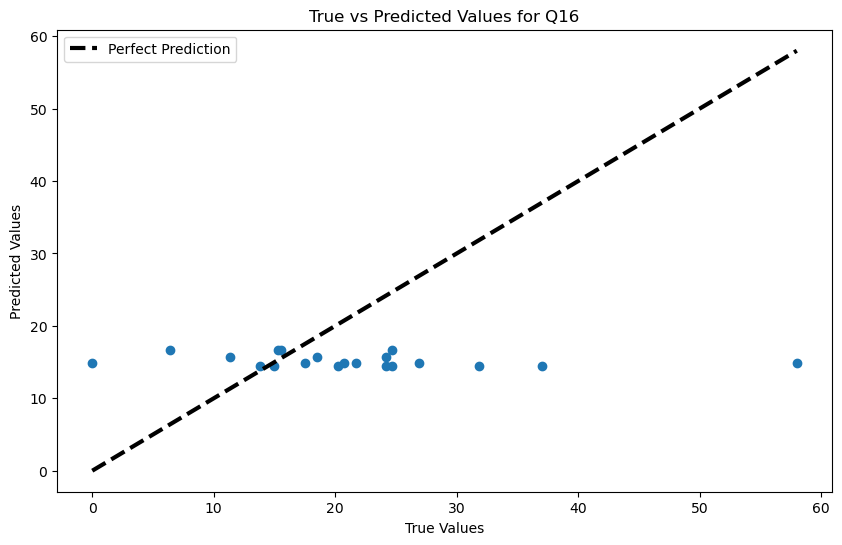


Predicting Q17:
Mean Squared Error for Q17: 495.1437777777779
Mean Absolute Error for Q17: 18.883333333333333


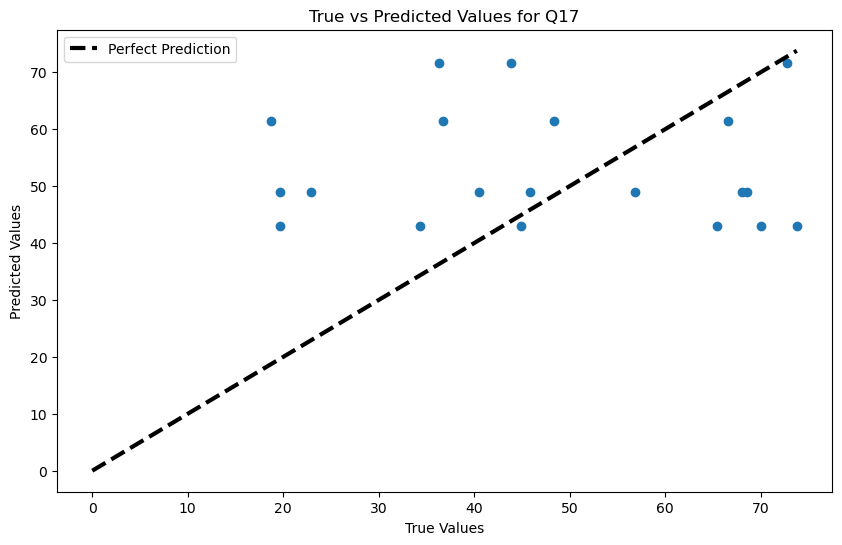


Predicting Q18:
Mean Squared Error for Q18: 299.98827777777785
Mean Absolute Error for Q18: 14.605


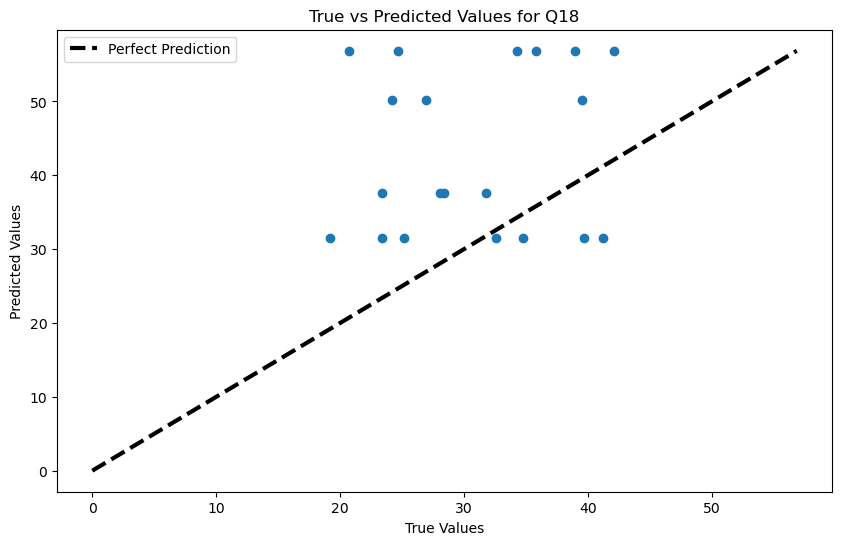


Predicting Q19:
Mean Squared Error for Q19: 81.24455555555555
Mean Absolute Error for Q19: 7.453333333333333


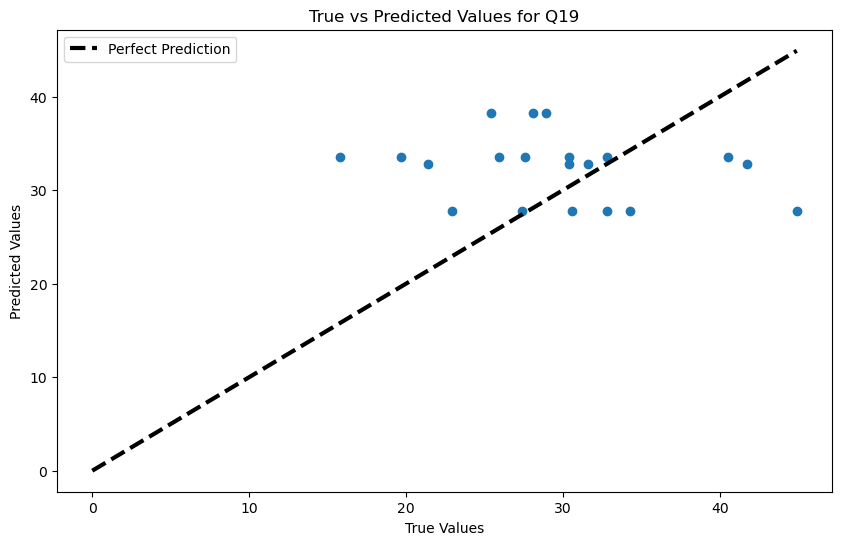


Predicting Q20:
Mean Squared Error for Q20: 354.7345555555555
Mean Absolute Error for Q20: 16.22


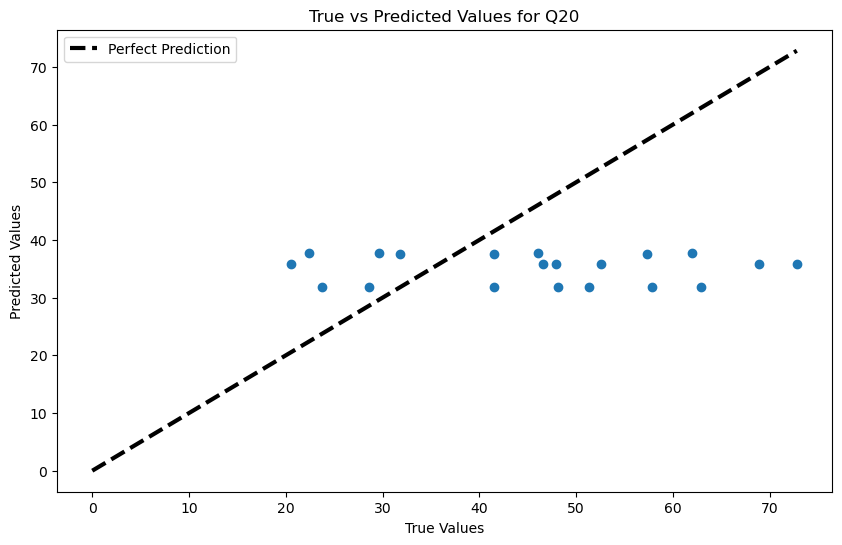


Predicting Q21:
Mean Squared Error for Q21: 396.22955555555563
Mean Absolute Error for Q21: 16.446666666666665


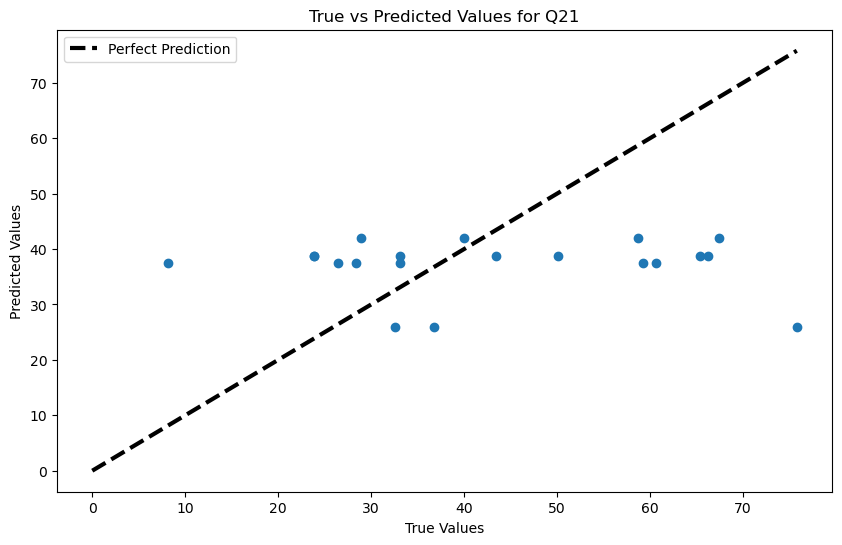


Predicting Q22:
Mean Squared Error for Q22: 328.3985555555555
Mean Absolute Error for Q22: 14.579999999999998


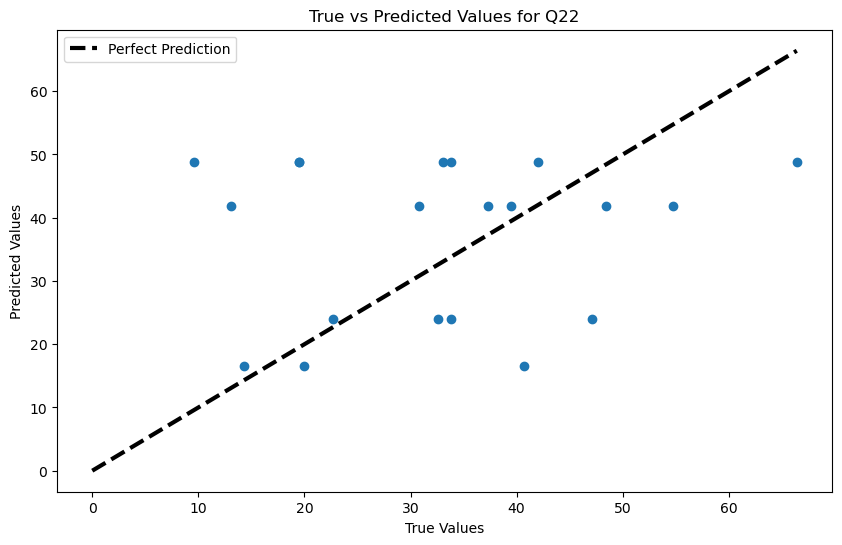


Predicting Q23:
Mean Squared Error for Q23: 424.9336111111112
Mean Absolute Error for Q23: 17.325


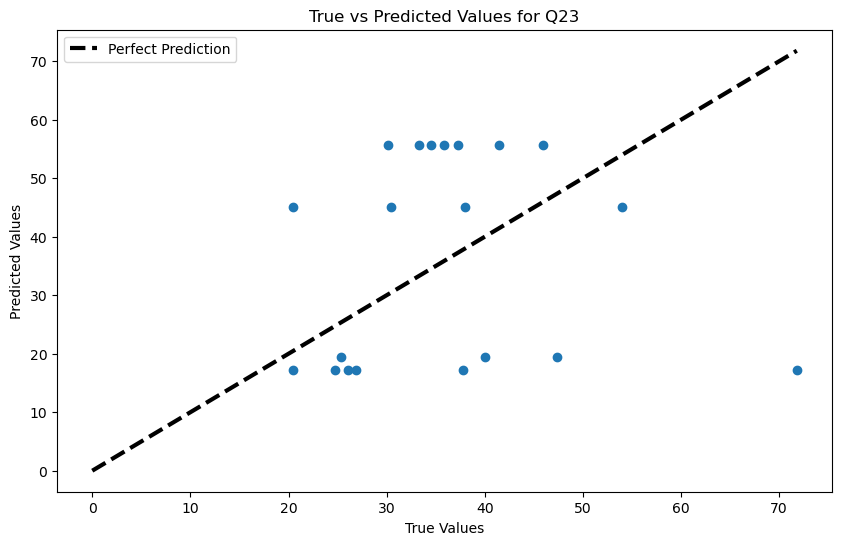


Predicting Q24:
Mean Squared Error for Q24: 247.94177777777776
Mean Absolute Error for Q24: 11.786666666666665


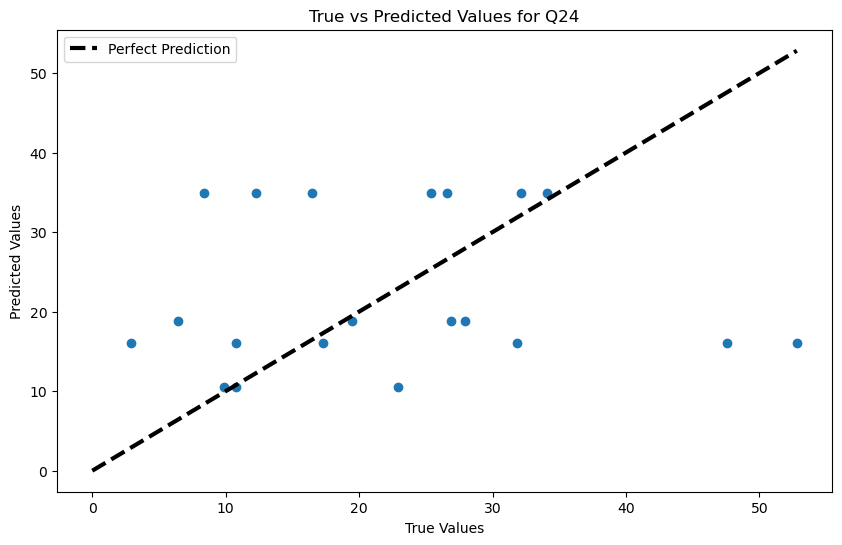


Predicting Q25:
Mean Squared Error for Q25: 127.91127777777778
Mean Absolute Error for Q25: 10.008333333333335


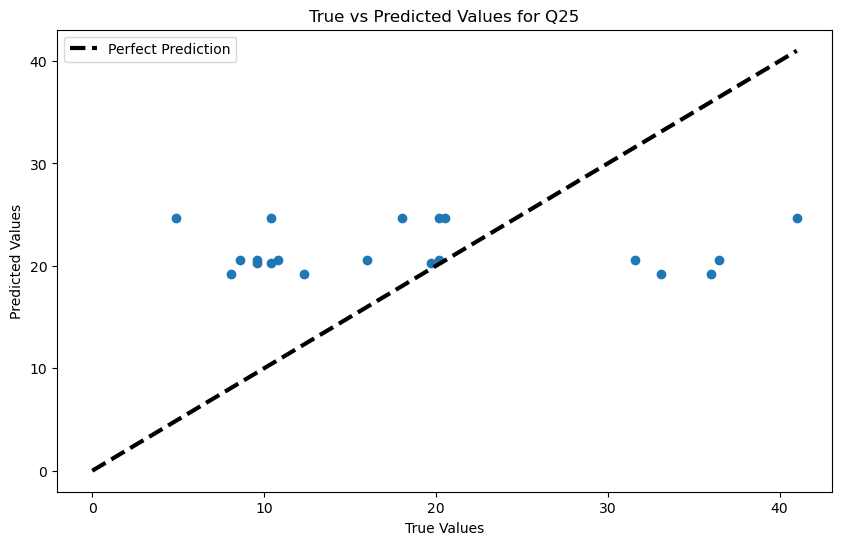


Predicting Q26:
Mean Squared Error for Q26: 521.5336111111111
Mean Absolute Error for Q26: 18.424999999999997


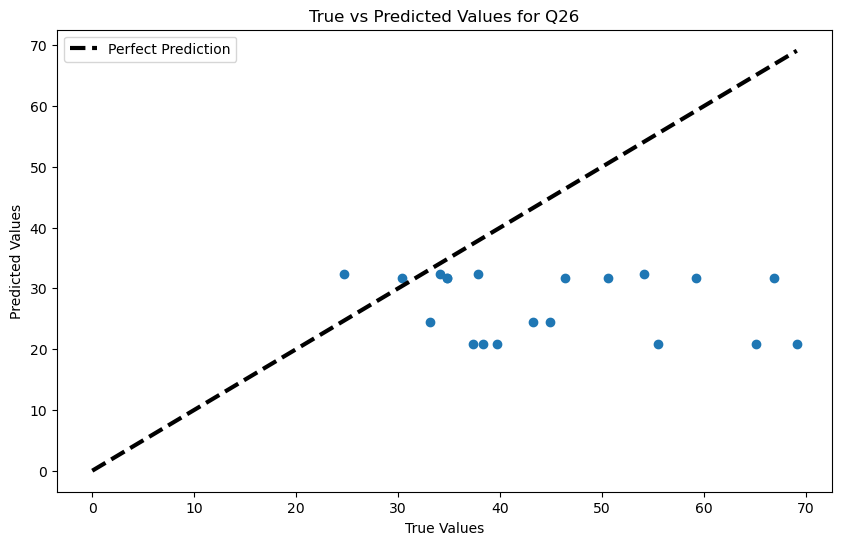


Predicting Q27:
Mean Squared Error for Q27: 953.0697777777777
Mean Absolute Error for Q27: 23.043333333333337


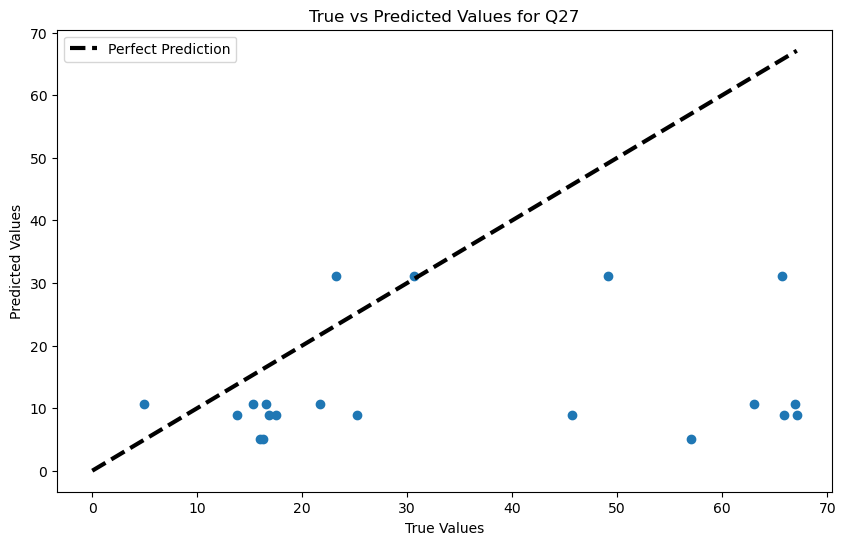


Predicting Q28:
Mean Squared Error for Q28: 298.81455555555556
Mean Absolute Error for Q28: 12.576666666666664


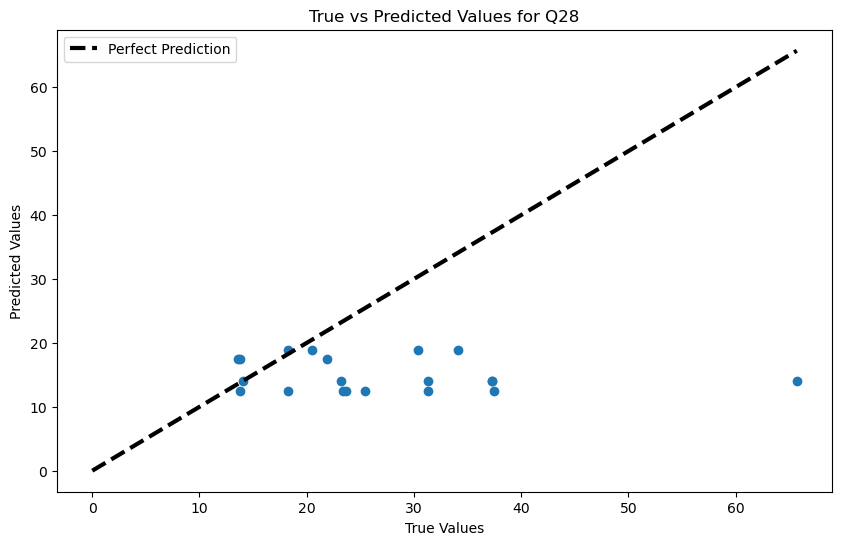


Predicting Q29:
Mean Squared Error for Q29: 448.087388888889
Mean Absolute Error for Q29: 17.841666666666665


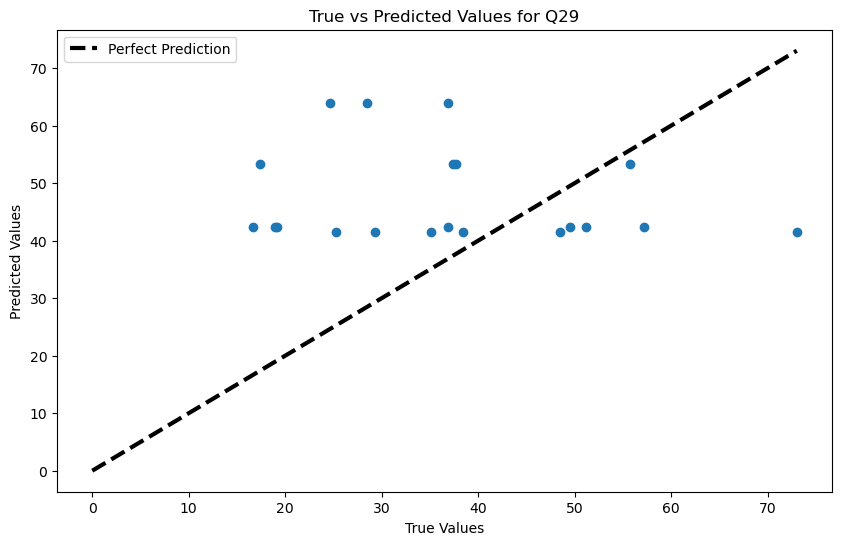


Predicting Q30:
Mean Squared Error for Q30: 229.44127777777777
Mean Absolute Error for Q30: 12.878333333333334


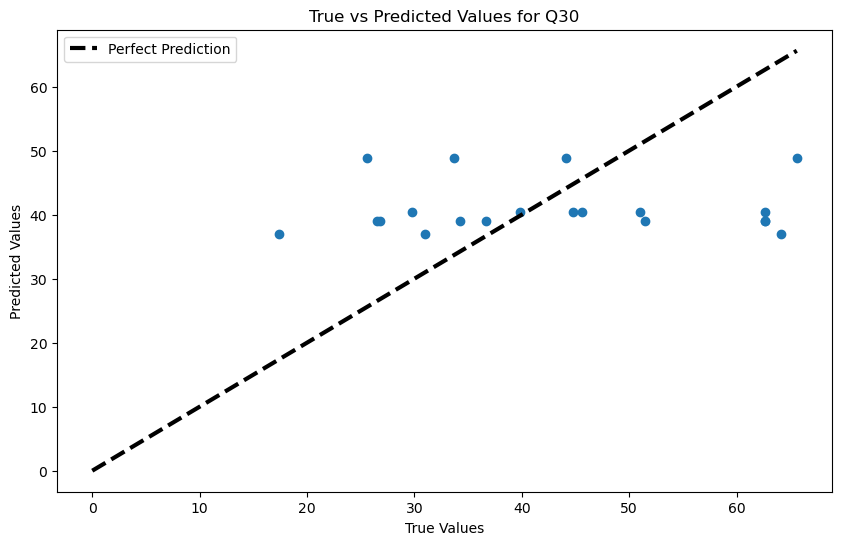


Predicting Q31:
Mean Squared Error for Q31: 210.12088888888883
Mean Absolute Error for Q31: 13.146666666666665


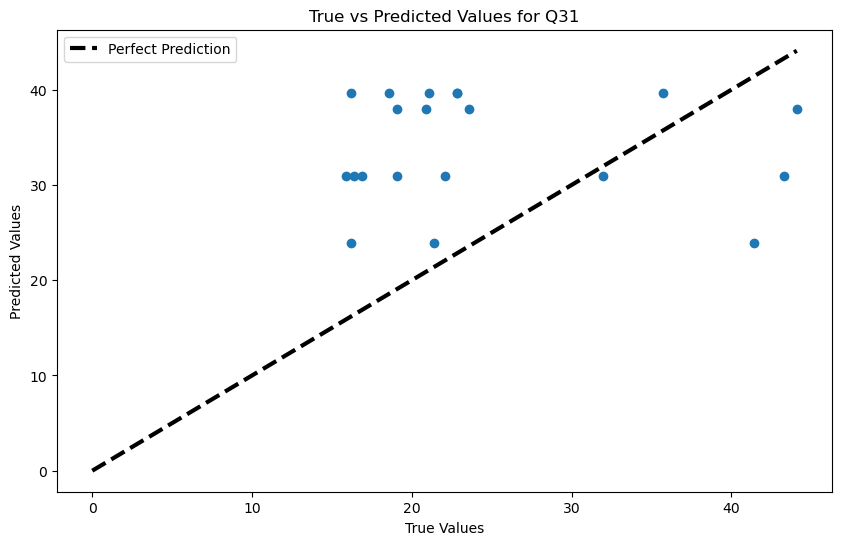

In [13]:
excluded_columns = ['Yeast']
target_columns = [f'Q{i}' for i in range(1, 32)]  # Create a list of target columns Q1-Q31

X = merged_data[merged_data.columns[~merged_data.columns.isin(excluded_columns + target_columns)]]
y = merged_data[target_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsRegressor(n_neighbors=3)
multi_output_knn = MultiOutputRegressor(knn)
multi_output_knn.fit(X_train, y_train)

y_pred = multi_output_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')

for i, target in enumerate(target_columns):
    print(f'Predicting {target}:')
    print(f"Mean Squared Error for {target}:", mse[i])
    print(f"Mean Absolute Error for {target}:", mae[i])

    plot_scatter(y_test, y_pred, target, i)  # Call the function to plot the scatterplot

    print()

# Correlation

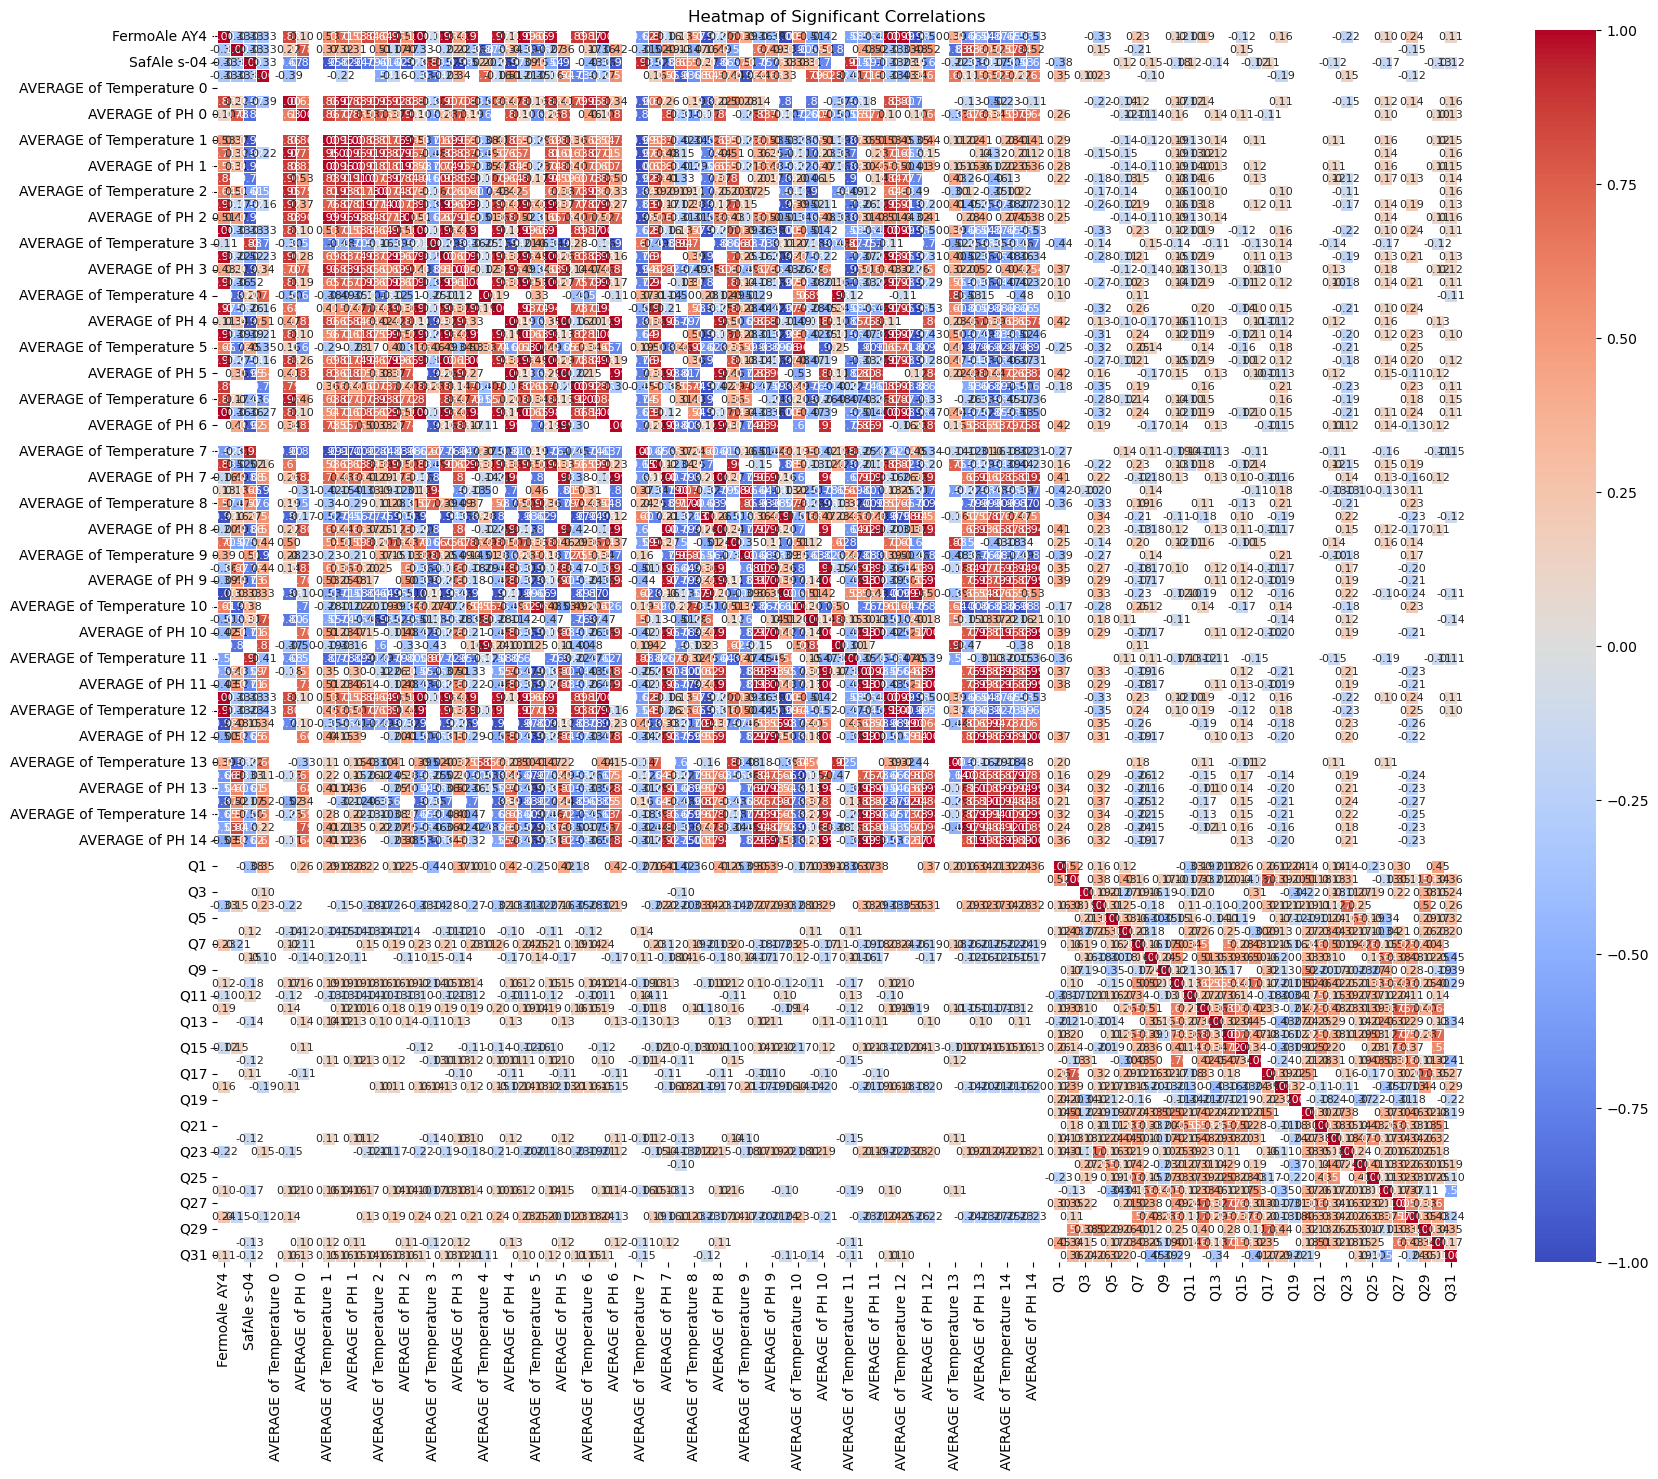

In [14]:
import seaborn as sns

# Calculate the correlation matrix considering only numeric columns
correlation_matrix = merged_data.corr(numeric_only=True)

# Set a threshold for significant correlations
threshold = 0.1

# Create a mask to display only significant correlations
mask = np.abs(correlation_matrix) < threshold

# Create a heatmap with increased figure size and smaller font for annotations
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask, annot_kws={"size": 8})
plt.title('Heatmap of Significant Correlations')

plt.show()